# 선형 분류 모델

In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def example_plot(xy, labels, a, b, title, filename=None):
    # Shape
    c_shape = ['bs', 'r^']

    # 1. Point
    for k, (point, label) in enumerate(zip(xy, labels),1):
        x,y = point
        plt.plot(x, y, c_shape[label[0]], mec='k')
        plt.text(x, y, '$P_{}$'.format(k), size=15, \
                 verticalalignment='top', horizontalalignment='left')

    # 2. Decision line
    tmp = np.linspace(0,1,500)
    decision_line = a * tmp + b
    plt.plot(tmp, decision_line, 'k-', linewidth=3)

    # 3. Contour
    X, Y = np.meshgrid(tmp, tmp)
    Z = np.zeros_like(X)
    Z[Y > a * X + b] = 1

    plt.contourf(X, Y, Z, cmap='coolwarm')
    # plt.axis('equal')
    plt.grid(linestyle='--', alpha=0.5)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title(title)
    if filename:
        plt.savefig(filename, dpi=300)
    plt.show()

In [3]:
def example_plot_only_line(xy, labels, a, b, title, filename=None):
    # Shape
    c_shape = ['bs', 'r^']

    # 1. Point
    for k, (point, label) in enumerate(zip(xy, labels),1):
        x,y = point
        plt.plot(x, y, c_shape[label[0]], mec='k')
        plt.text(x, y, '$P_{}$'.format(k), size=15, \
                 verticalalignment='top', horizontalalignment='left')

    # 2. Decision line
    tmp = np.linspace(0,1,500)
    decision_line = a * tmp + b
    plt.plot(tmp, decision_line, 'k-', linewidth=3)

    # 3. Contour
#     X, Y = np.meshgrid(tmp, tmp)
#     Z = np.zeros_like(X)
#     Z[Y > a * X + b] = 1

#     plt.contourf(X, Y, Z, cmap='coolwarm')
    # plt.axis('equal')
    plt.grid(linestyle='--', alpha=0.5)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title(title)
    if filename:
        plt.savefig(filename, dpi=300)
    plt.show()

In [4]:
def example_plot_wo_contour(xy, labels, title, filename=None):
    # Shape
    c_shape = ['bs', 'r^']

    # 1. Point
    for k, (point, label) in enumerate(zip(xy, labels),1):
        x,y = point
        plt.plot(x, y, c_shape[label[0]], mec='k')
        plt.text(x, y, '$P_{}$'.format(k), size=15, \
                 verticalalignment='top', horizontalalignment='left')

#     # 2. Decision line
#     tmp = np.linspace(0,1,500)
#     decision_line = a * tmp + b
#     plt.plot(tmp, decision_line, 'k-', linewidth=3)

    # 3. Contour
#     X, Y = np.meshgrid(tmp, tmp)
#     Z = np.zeros_like(X)
#     Z[Y > a * X + b] = 1

#     plt.contourf(X, Y, Z, cmap='coolwarm')
    # plt.axis('equal')
    plt.grid(linestyle='--', alpha=0.5)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title(title)
    if filename:
        plt.savefig(filename, dpi=300)
    plt.show()

In [29]:
def plot_model(sess, model, feature_labmda, title):
    from pandas import DataFrame
    xx, yy = np.meshgrid(np.linspace(-0.05,1.1,200), np.linspace(-0.05,1.1,200))
    prediction = sess.run(model, feed_dict={x: np.array([feature_labmda(xxval, yyval) for xxval, yyval in zip(xx.flatten(), yy.flatten())])})
    Z = prediction.reshape(xx.shape)
    df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
    markers = {0:'bs', 1:'r^'}
    _, ax = plt.subplots(figsize=(12, 12))
    cs = ax.contourf(xx, yy, Z, 20, cmap='coolwarm', alpha=.9)
    ax.clabel(cs, colors='gray')
    cs = ax.contour(xx, yy, Z, cmap='gray', levels=[0, 0.5, 1.0], linestyles='--', linewidths=2)
    ax.clabel(cs, colors='k')
    predictions = sess.run(model, feed_dict={x: xy})
    for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k][0]], mec='k')
        plt.text(x0, y0, '$P_{}$\n({:1.0f}%)'.format(k+1, 100*predictions[k][0]), size=15, \
                 verticalalignment='top', horizontalalignment='left')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    plt.grid(linestyle='--', alpha=0.5)
    plt.title(title)
    plt.show()

In [58]:
def plot_model2(sess, model, feature_labmda, title):
    from pandas import DataFrame
    xx, yy = np.meshgrid(np.linspace(-1.5,1.5, 200), np.linspace(-1.5,1.5, 200))
    prediction = sess.run(model, feed_dict={x: np.array([feature_labmda(xxval, yyval) for xxval, yyval in zip(xx.flatten(), yy.flatten())])})
    Z = prediction.reshape(xx.shape)
    df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
    colors = {0:'red', 1:'blue'}
    markers = {0:'bs', 1:'r^'}
    _, ax = plt.subplots(figsize=(12, 12))
    ax.contourf(xx, yy, Z, 5, cmap='coolwarm', alpha=.9)
#     ax.clabel(cs, colors='k')
    cs = ax.contour(xx, yy, Z, cmap='gray', levels=[0, 0.5, 1.0], linestyles='--', linewidths=2)
    ax.clabel(cs, colors='k')
    grouped = df.groupby('label')
#     for key, group in grouped:
#         group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key], edgecolor='k')
    predictions = sess.run(model, feed_dict={x: xy})
    for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k]], mec='k', alpha=0.6)
    ax.set_xlim([-1.3, 1.3])
    ax.set_ylim([-1.3, 1.3])
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

In [52]:
def plot_data(xy,labels):
    from pandas import DataFrame
    df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
    colors = {0:'red', 1:'blue'}
    markers = {0:'bs', 1:'r^'}
    _, ax = plt.subplots(figsize=(12, 12))
    for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k]], mec='k', alpha=0.6)
    ax.set_xlim([-1.3, 1.3])
    ax.set_ylim([-1.3, 1.3])
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [53]:
def plot_scatter_softmax(curr_W, curr_b, xy, labels):
    x1 = np.linspace(-0.1, 1.1)
    X, Y = np.meshgrid(x1,x1)
    Z1 = X * curr_W[0,0] + Y * curr_W[1,0] + curr_b[0]
    Z2 = X * curr_W[0,1] + Y * curr_W[1,1] + curr_b[1]
    Z = np.exp(Z1) / (np.exp(Z1) + np.exp(Z2))
    markers = ['bs', 'r^']
    plt.figure(figsize=(12,12))
    cs = plt.contourf(X, Y, Z, np.linspace(0, 1, 11), cmap='coolwarm')
    plt.clabel(cs, colors='k')
    for k, xy0 in enumerate(xy):
        x0, y0 = xy0
        z1 = x0 * curr_W[0,0] + y0 * curr_W[1,0] + curr_b[0]
        z2 = x0 * curr_W[0,1] + y0 * curr_W[1,1] + curr_b[1]
        z = np.array([z1,z2])
        softmax_z = np.exp(z) / np.sum(np.exp(z))
        plt.plot(x0, y0, markers[labels[k][0]], mec='k')
        plt.text(x0, y0, '$P_{}$\n({:1.1f},{:1.1f})'.format(k+1, softmax_z[0], softmax_z[1]), size=15, \
                 verticalalignment='top', horizontalalignment='left')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.show()

## 이항 분류 모델

In [9]:
xy = np.array([[.2, .4], [.4, .2], [.65,.3], [.8, .5], 
               [.5, .8], [.25, .8]])
labels = np.array([[0],[0],[0],[1],[1],[1]])
print(xy)
print(labels)

[[0.2  0.4 ]
 [0.4  0.2 ]
 [0.65 0.3 ]
 [0.8  0.5 ]
 [0.5  0.8 ]
 [0.25 0.8 ]]
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]]


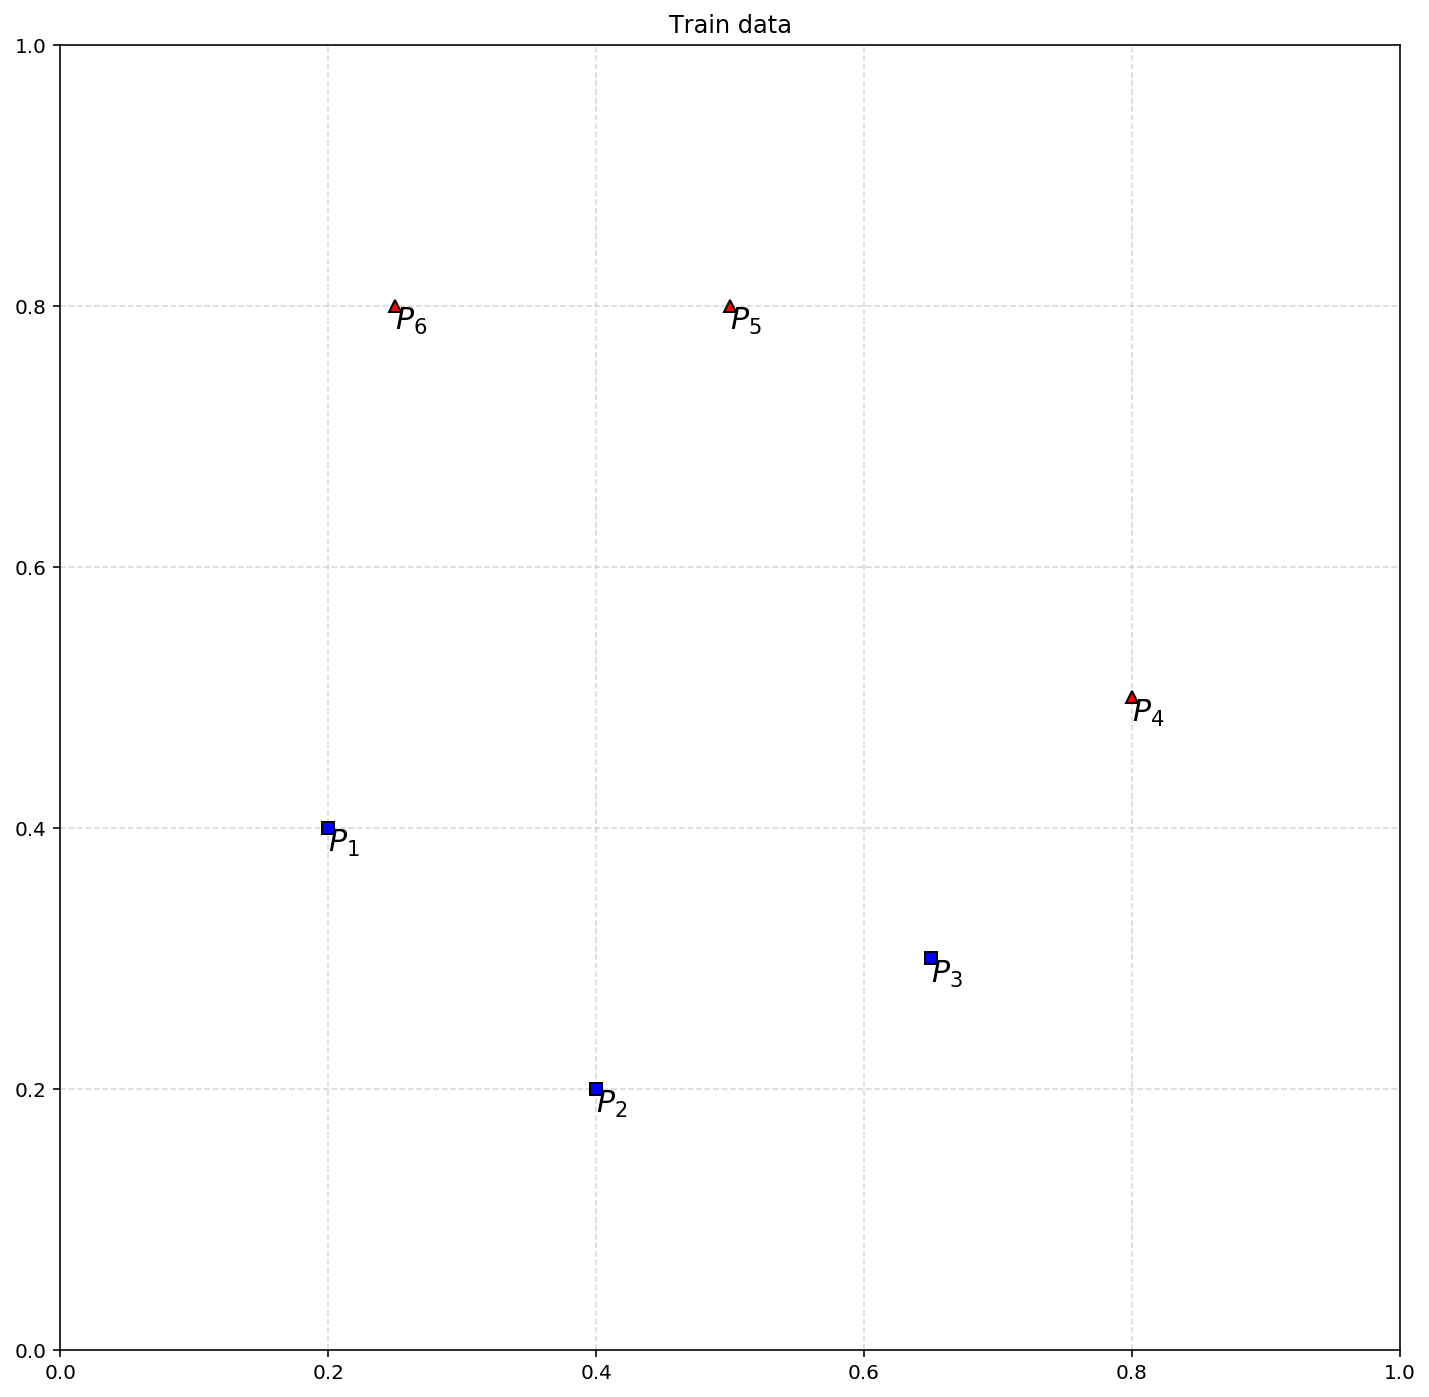

In [12]:
plt.rcParams['figure.figsize']=(12,12)
example_plot_wo_contour(xy,labels,'Train data')

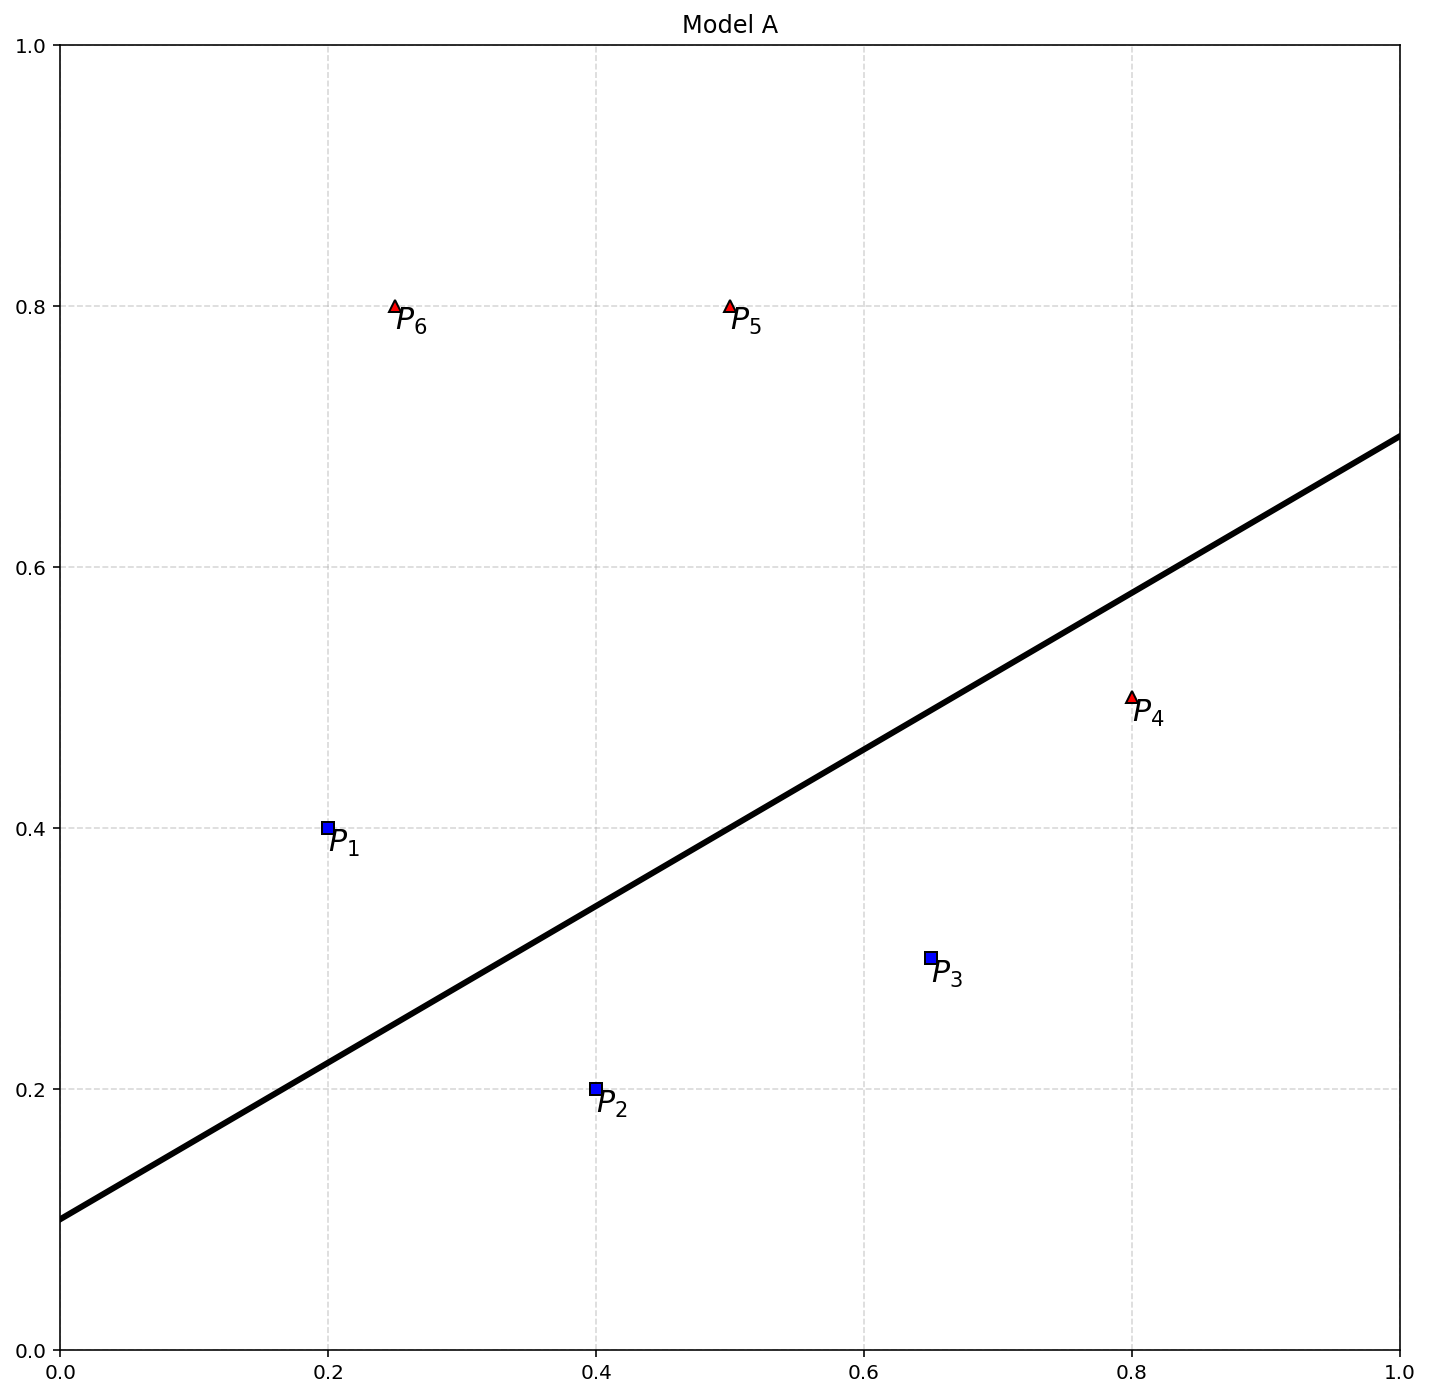

In [13]:
example_plot_only_line(xy, labels, 0.6, 0.1, 'Model A')

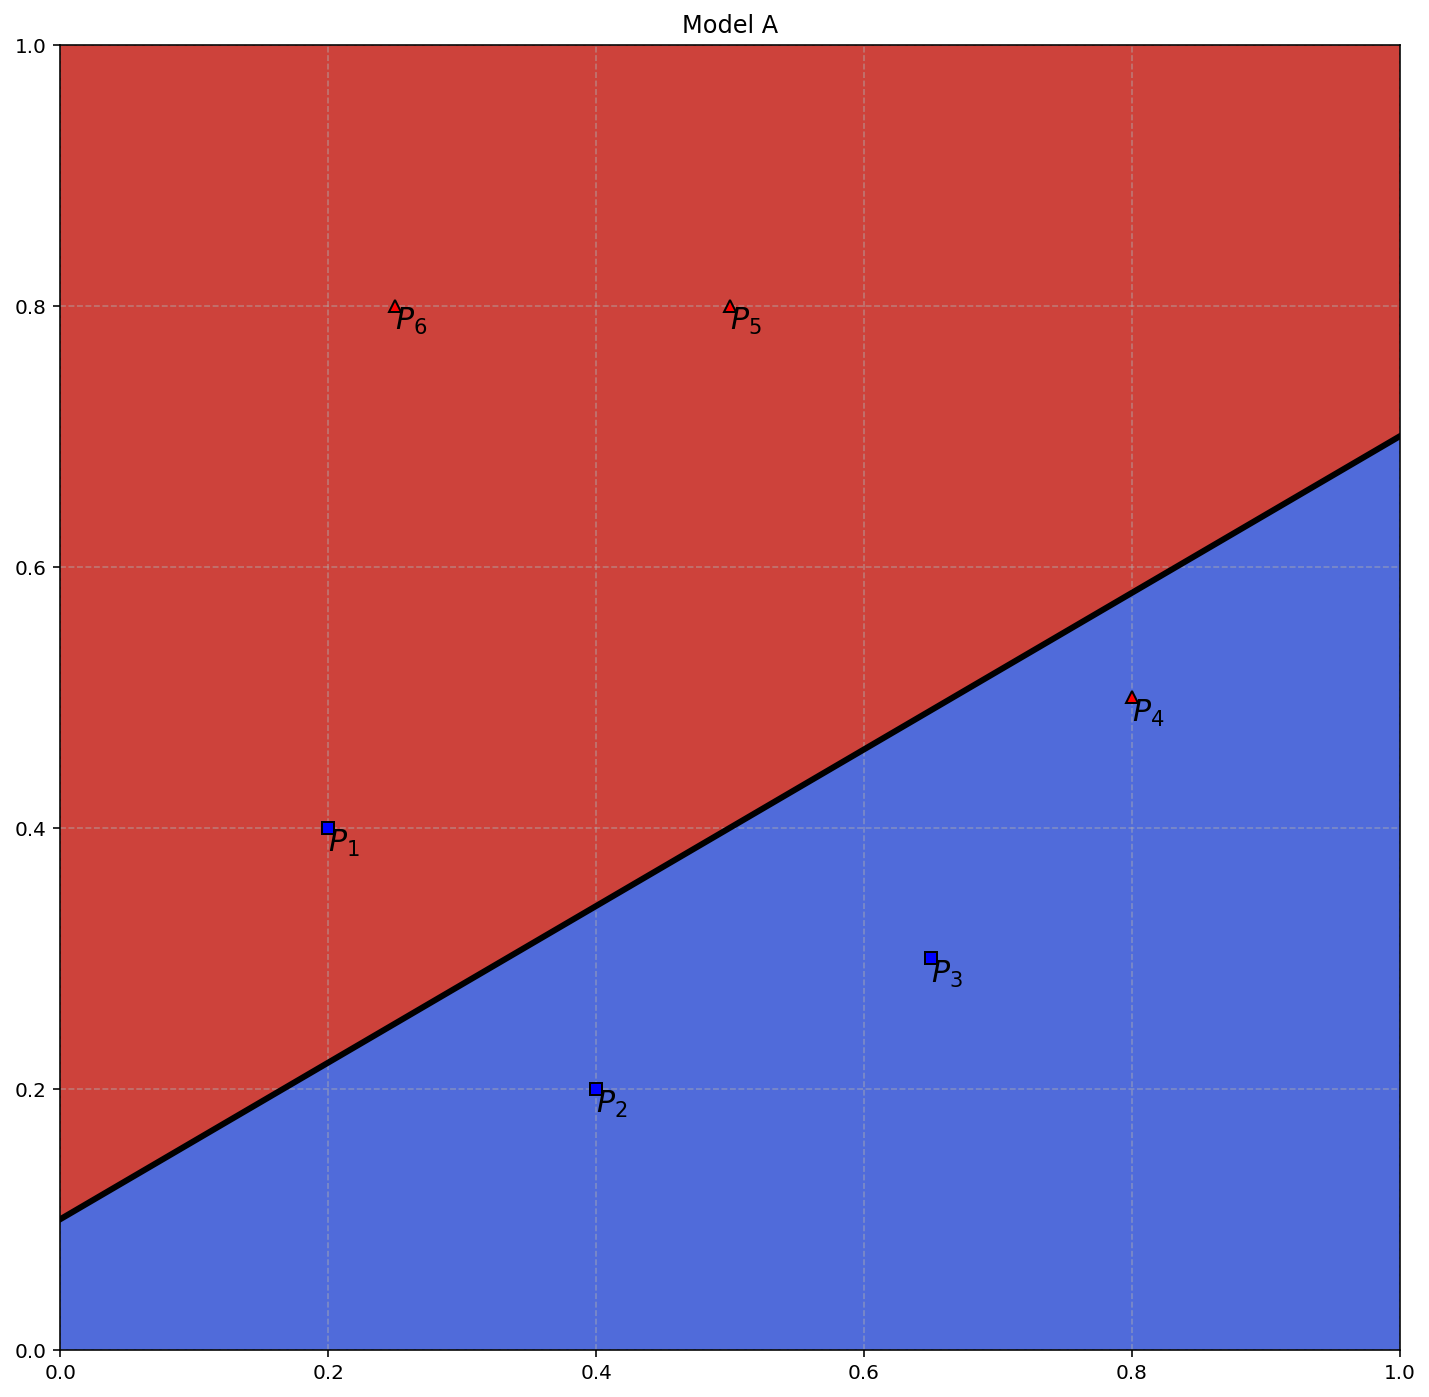

In [14]:
example_plot(xy, labels, 0.6, 0.1, 'Model A')

In [17]:
# Model A
W = tf.Variable(np.array([[-6],[10]]), dtype=tf.float64)
b = tf.Variable(np.array([-1]), dtype=tf.float64)
x = tf.placeholder(tf.float64, shape=(None, 2))
yhat = tf.matmul(x,W) + b

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

predic = sess.run(yhat, feed_dict={x:xy})
print(predic>0)

[[ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]]


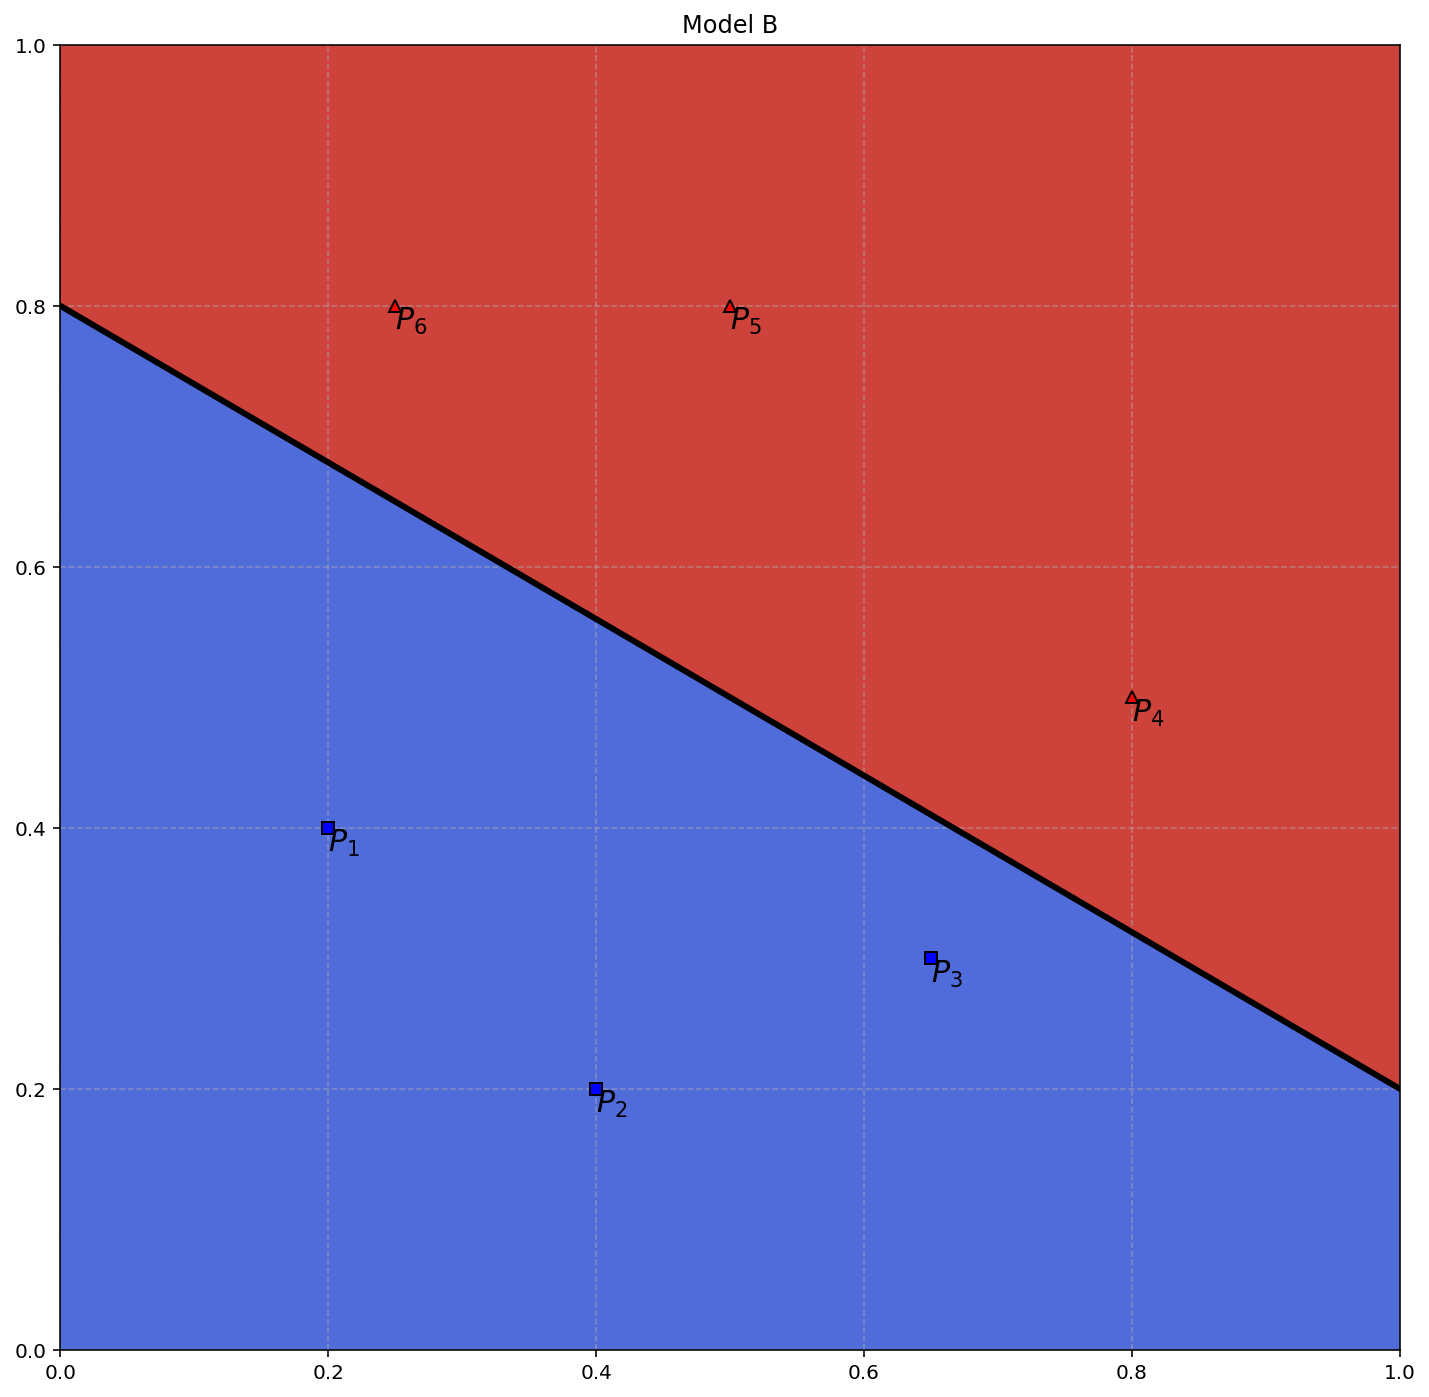

In [18]:
example_plot(xy, labels, -0.6, 0.8, 'Model B')

In [19]:
# Model B
W = tf.Variable(np.array([[6],[10]]), dtype=tf.float64)
b = tf.Variable(np.array([-8]), dtype=tf.float64)
x = tf.placeholder(tf.float64, shape=(None, 2))
yhat = tf.matmul(x,W) + b

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

predic = sess.run(yhat, feed_dict={x:xy})
print(predic>0)

[[False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]]


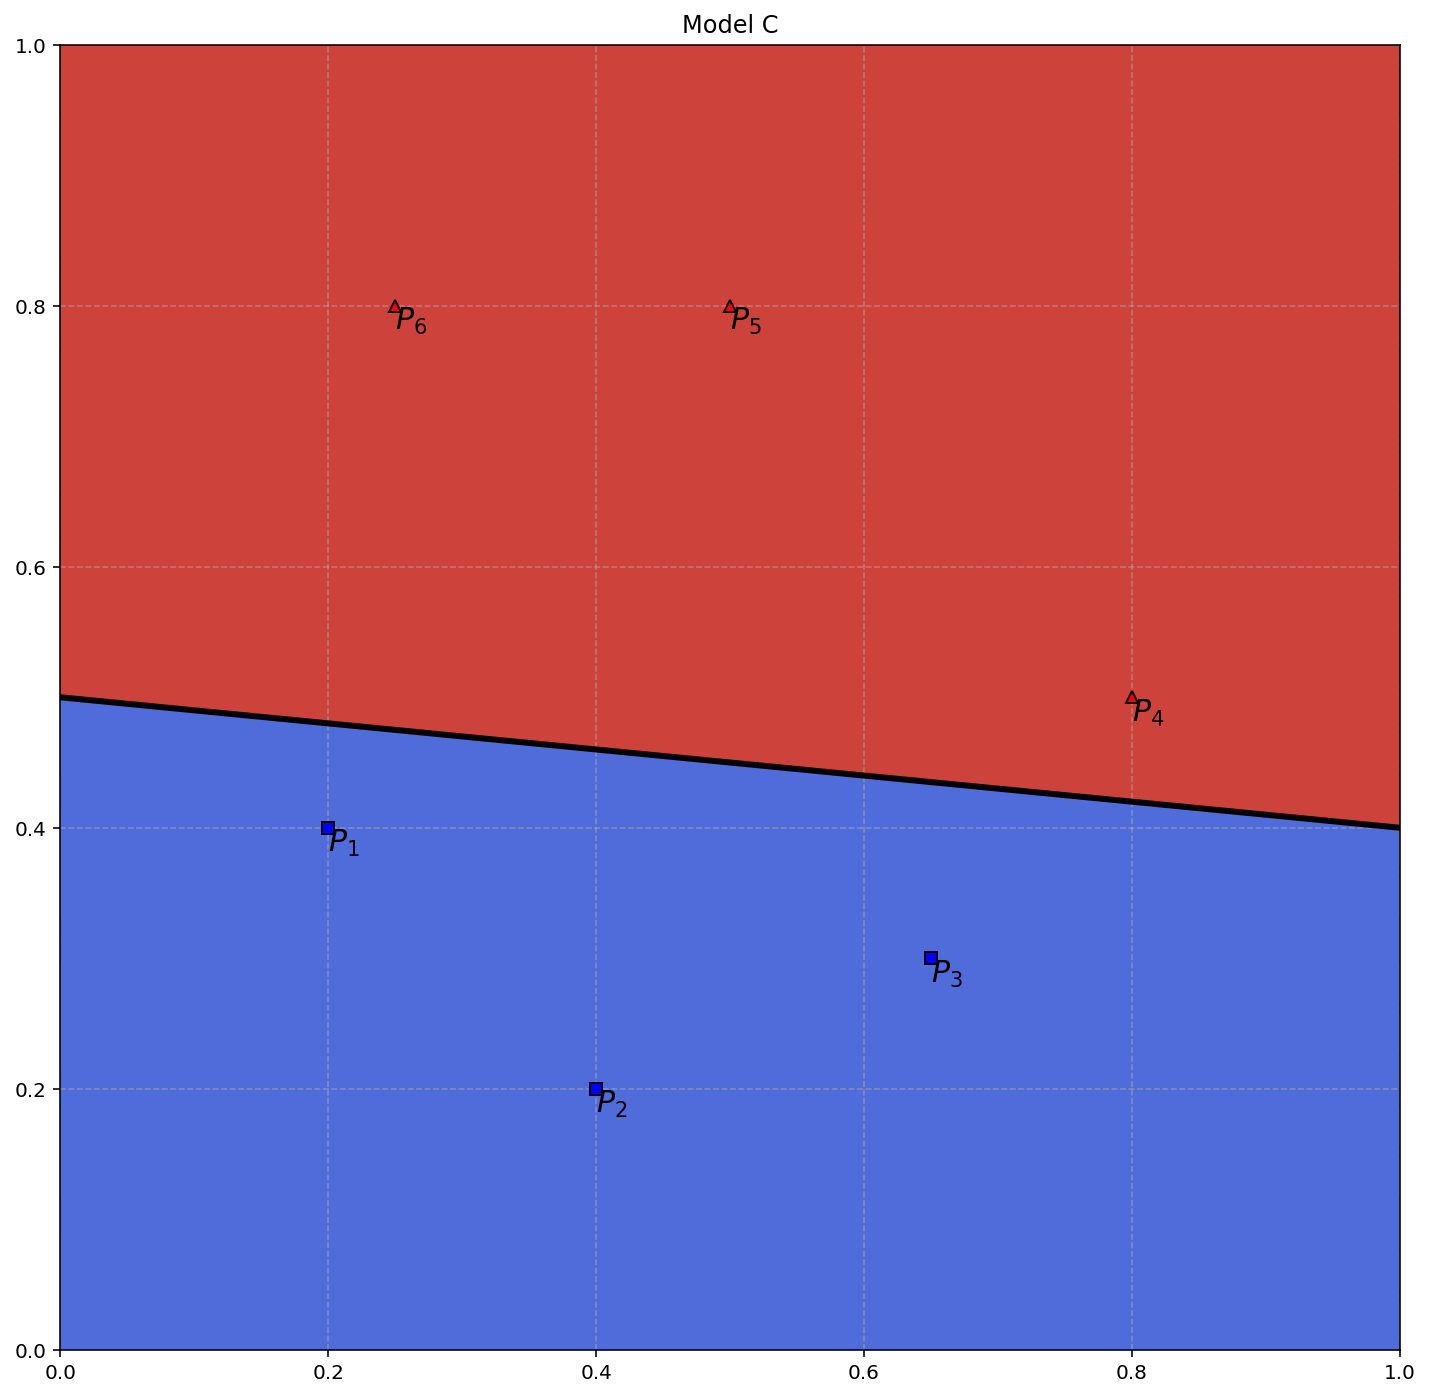

In [20]:
example_plot(xy, labels, -0.1, 0.5, 'Model C')

In [21]:
# Model C
W = tf.Variable(np.array([[1],[10]]), dtype=tf.float64)
b = tf.Variable(np.array([-5]), dtype=tf.float64)
x = tf.placeholder(tf.float64, shape=(None, 2))
yhat = tf.matmul(x,W) + b

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

predic = sess.run(yhat, feed_dict={x:xy})
print(predic>0)

[[False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]]


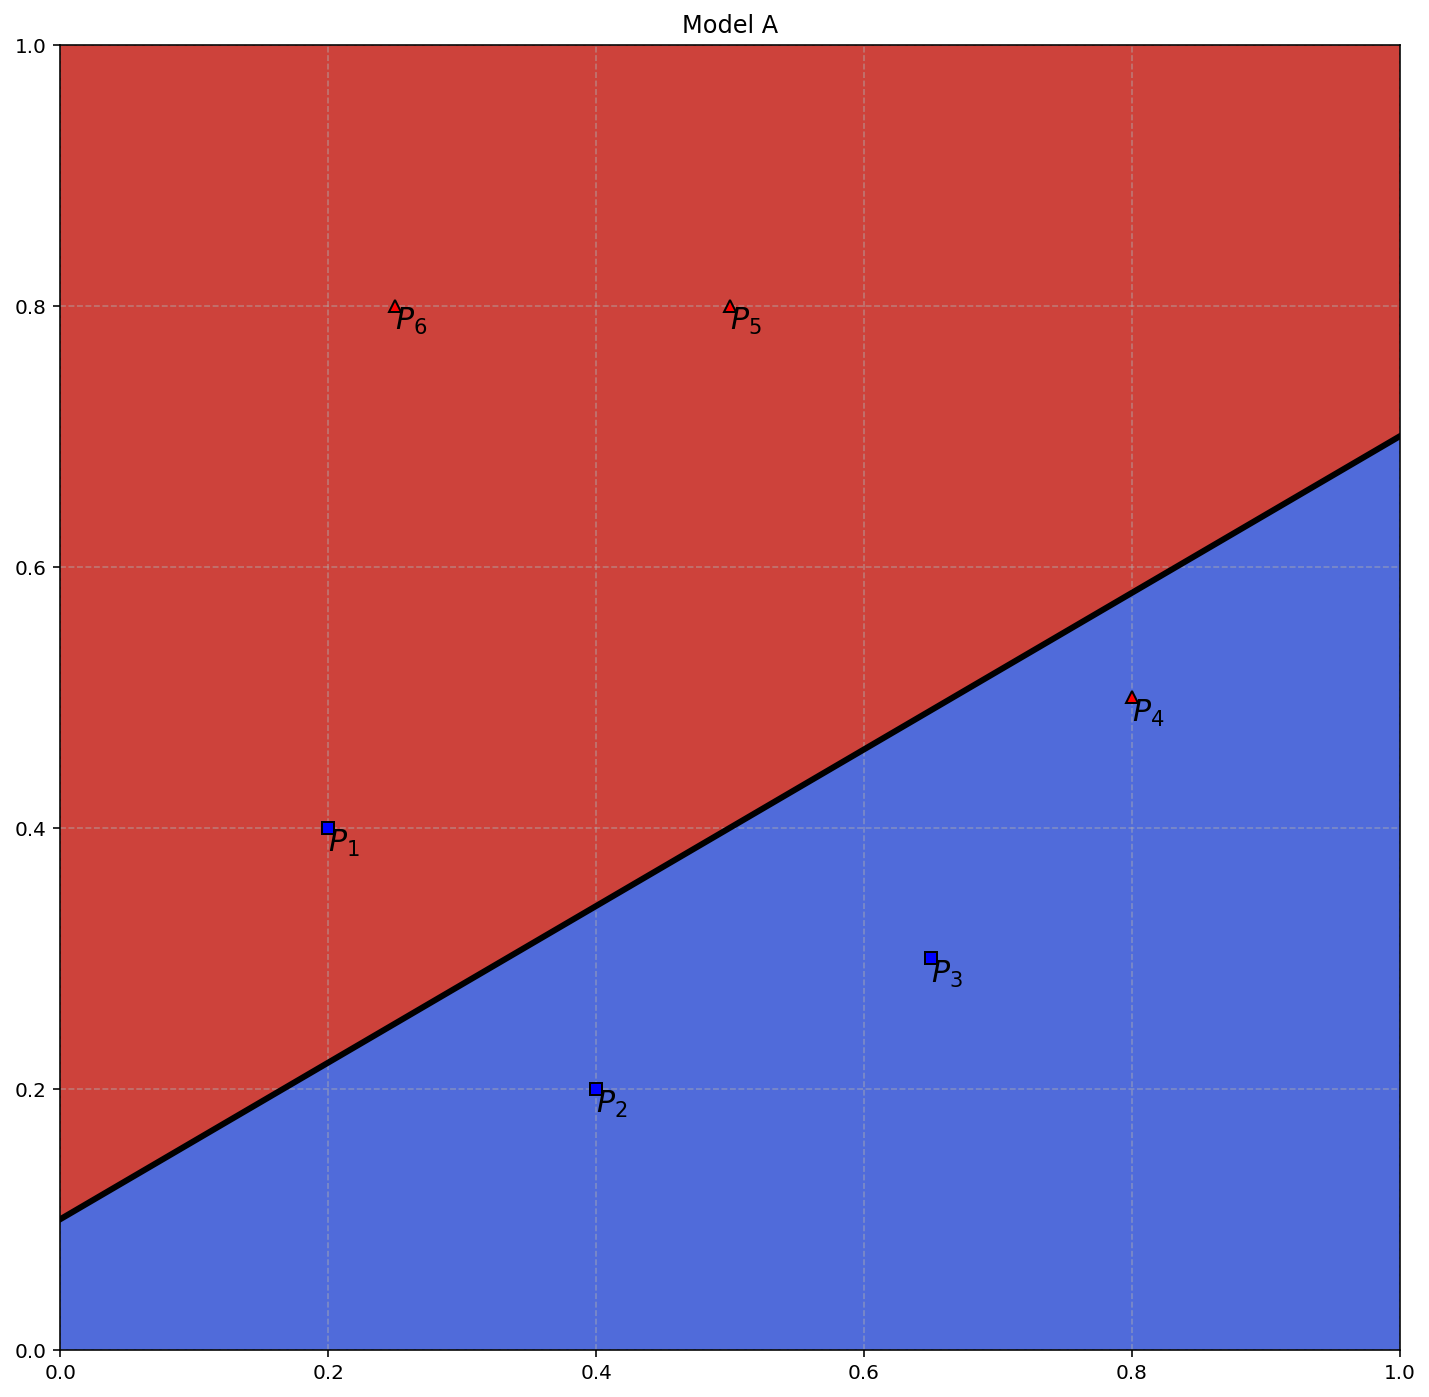

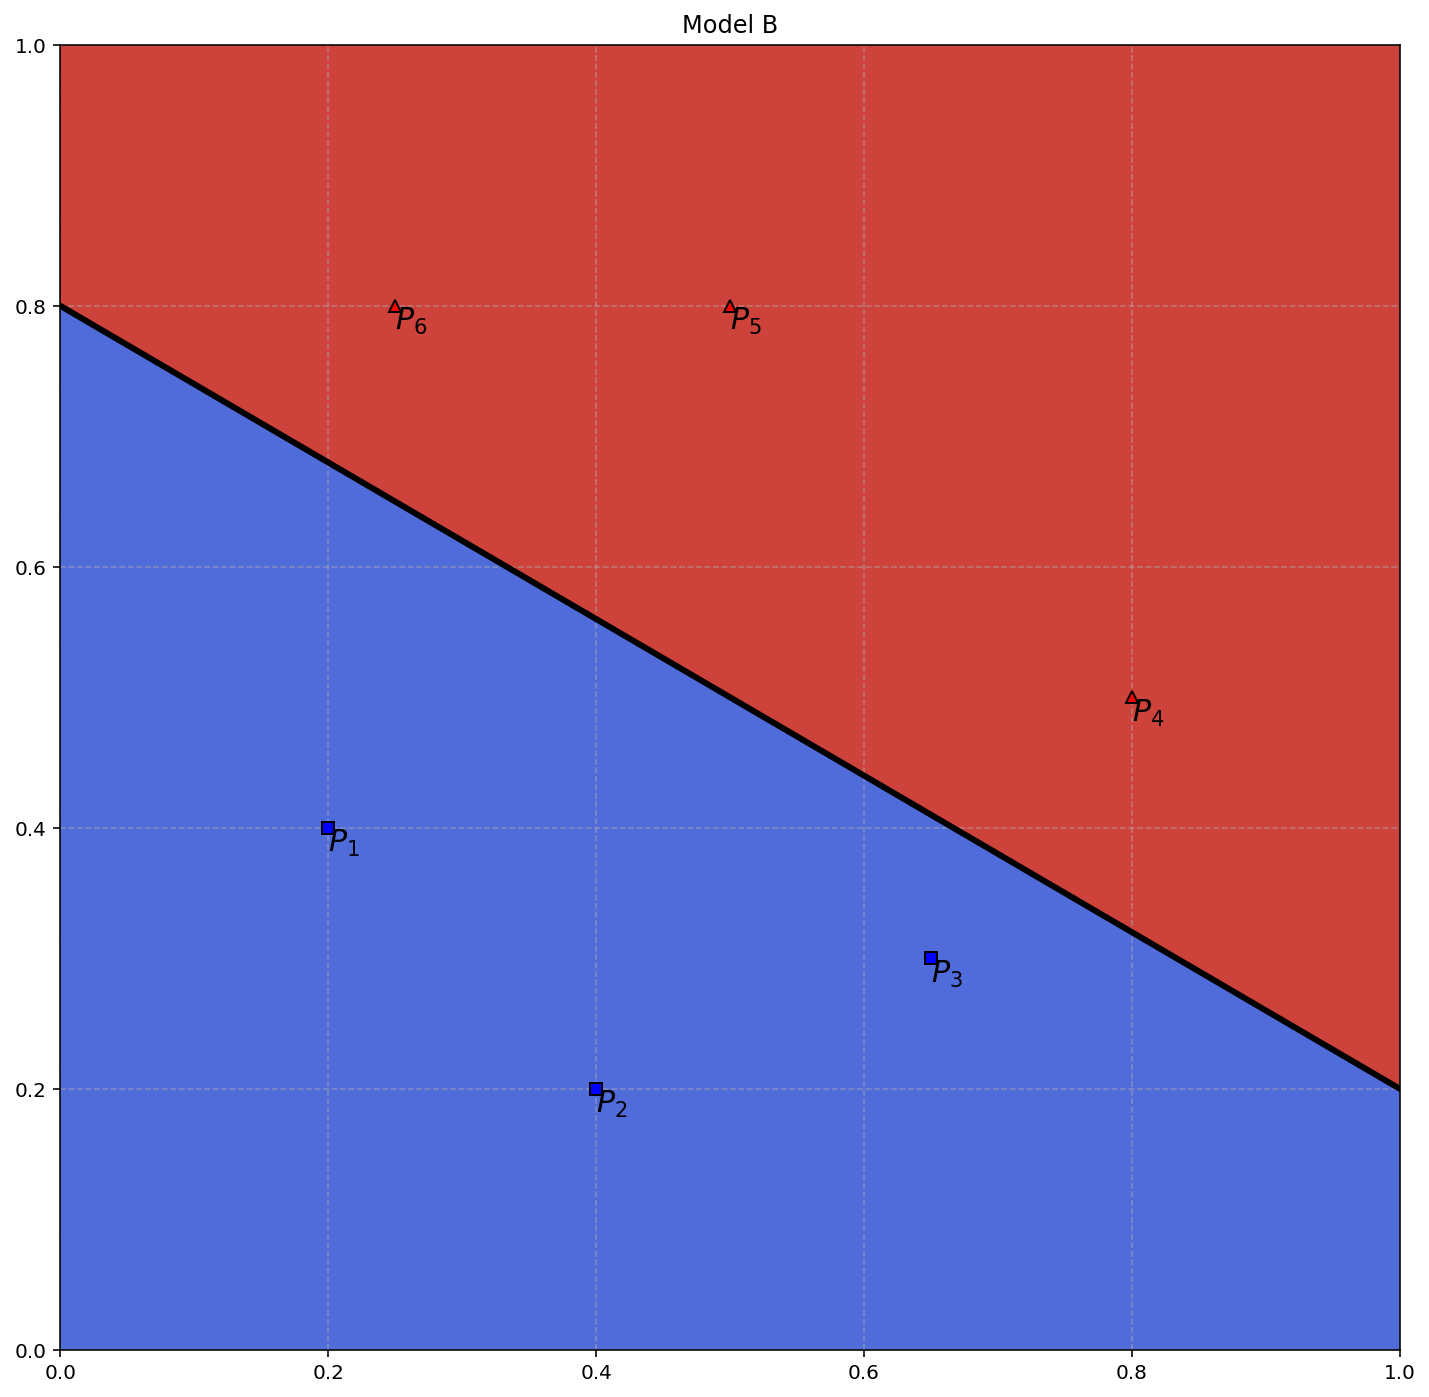

In [23]:
example_plot(xy, labels, 0.6, 0.1, 'Model A')
example_plot(xy, labels, -0.6, 0.8, 'Model B')

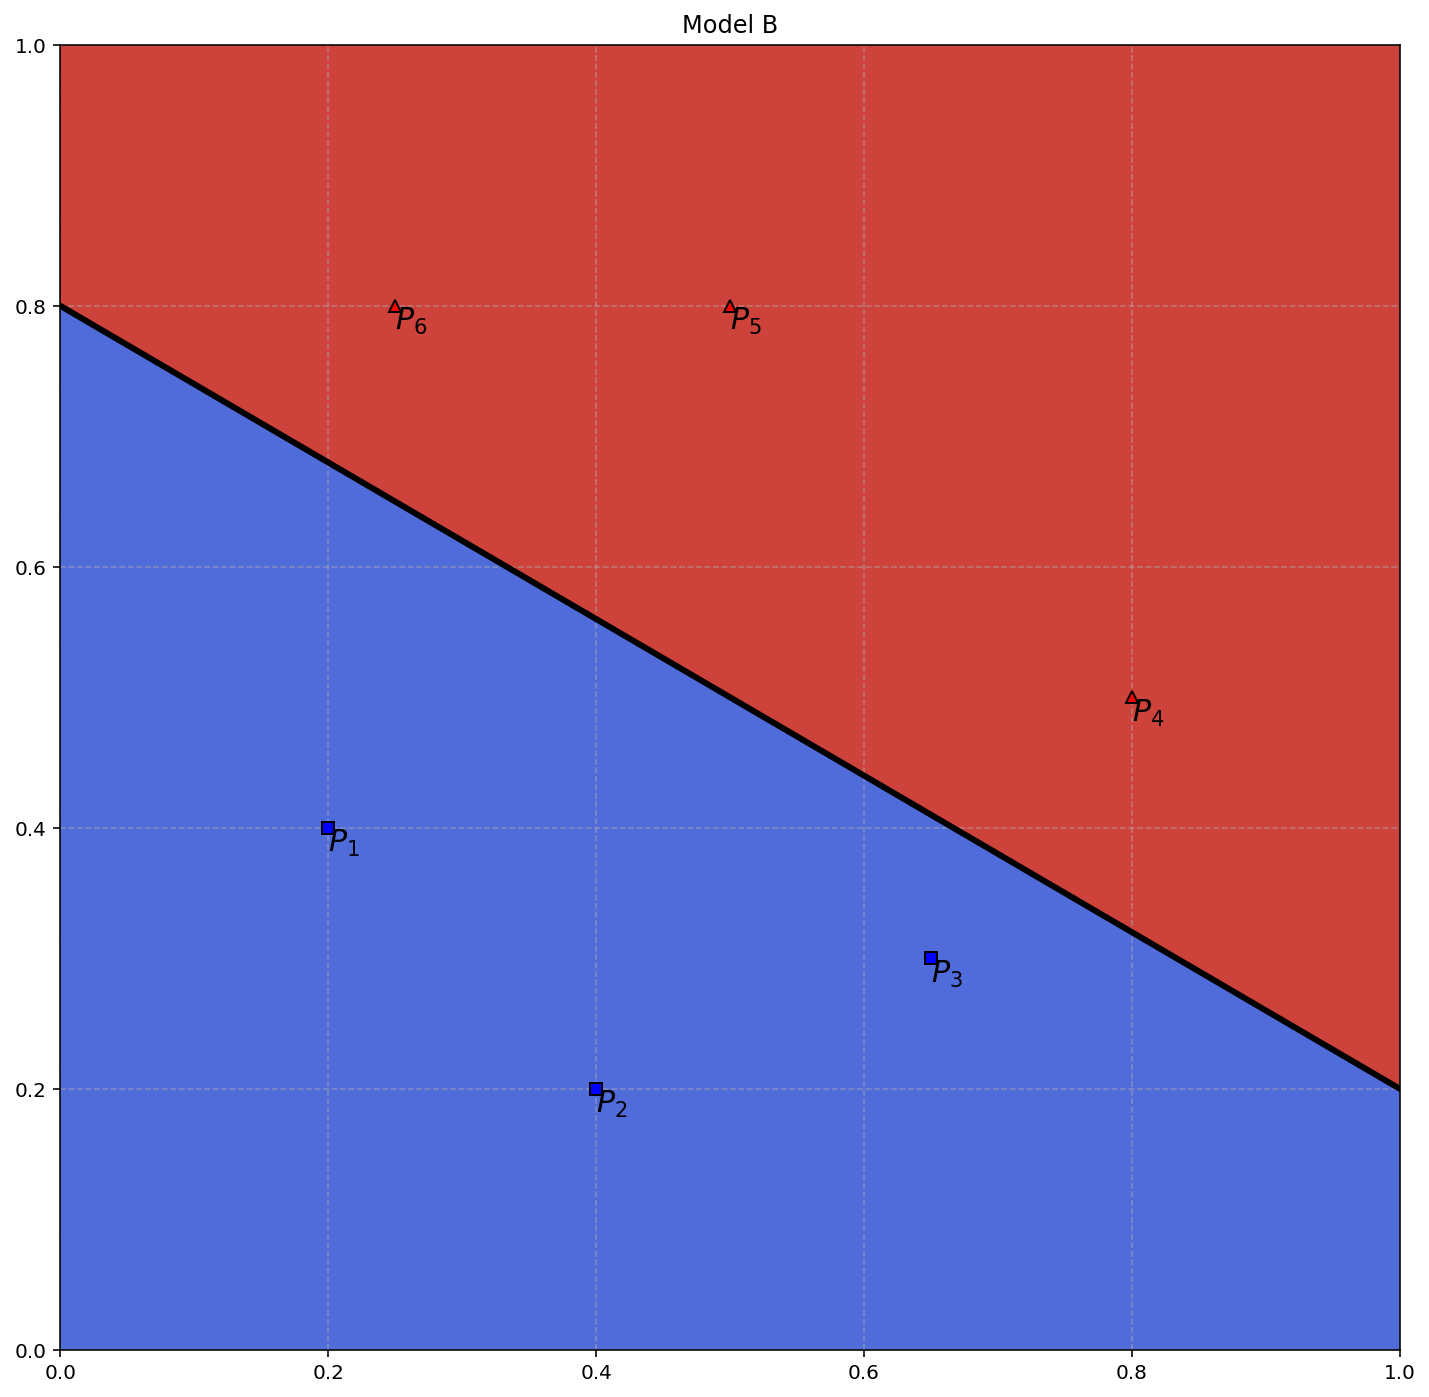

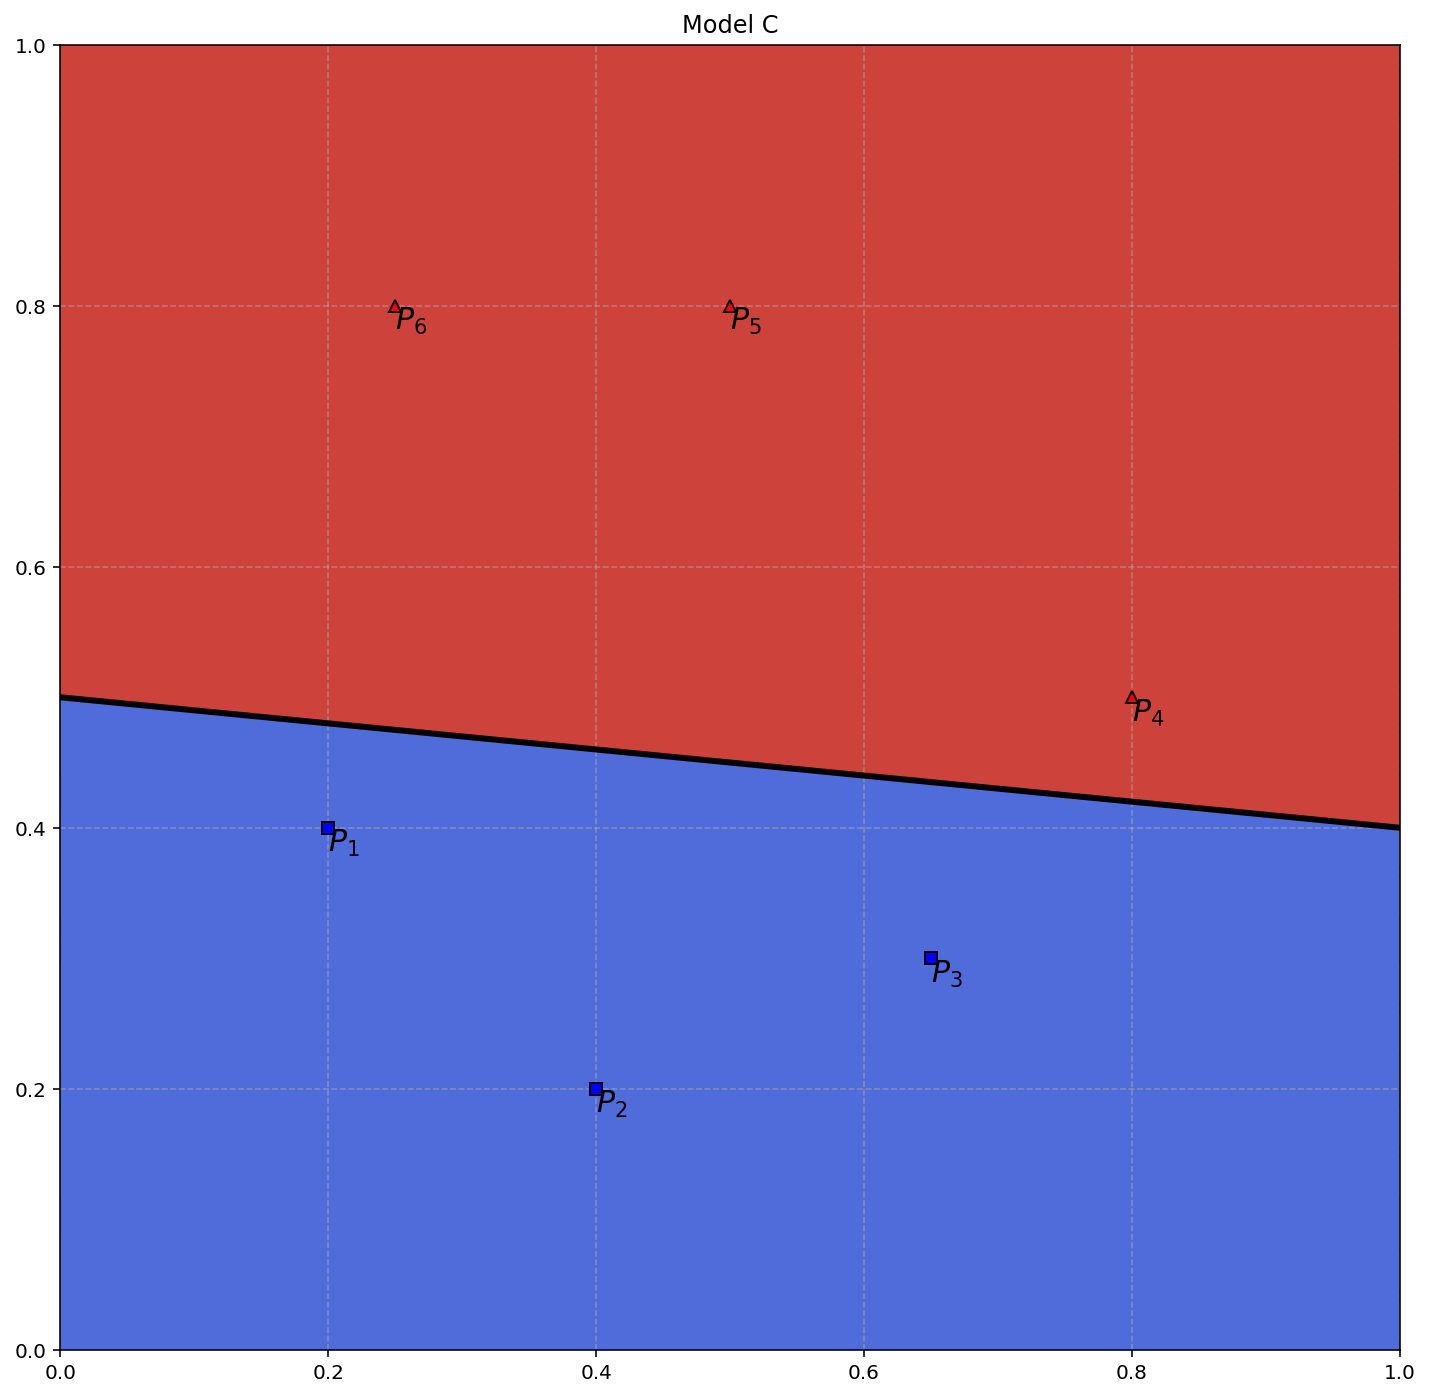

In [24]:
example_plot(xy, labels, -0.6, 0.8, 'Model B')
example_plot(xy, labels, -0.1, 0.5, 'Model C')

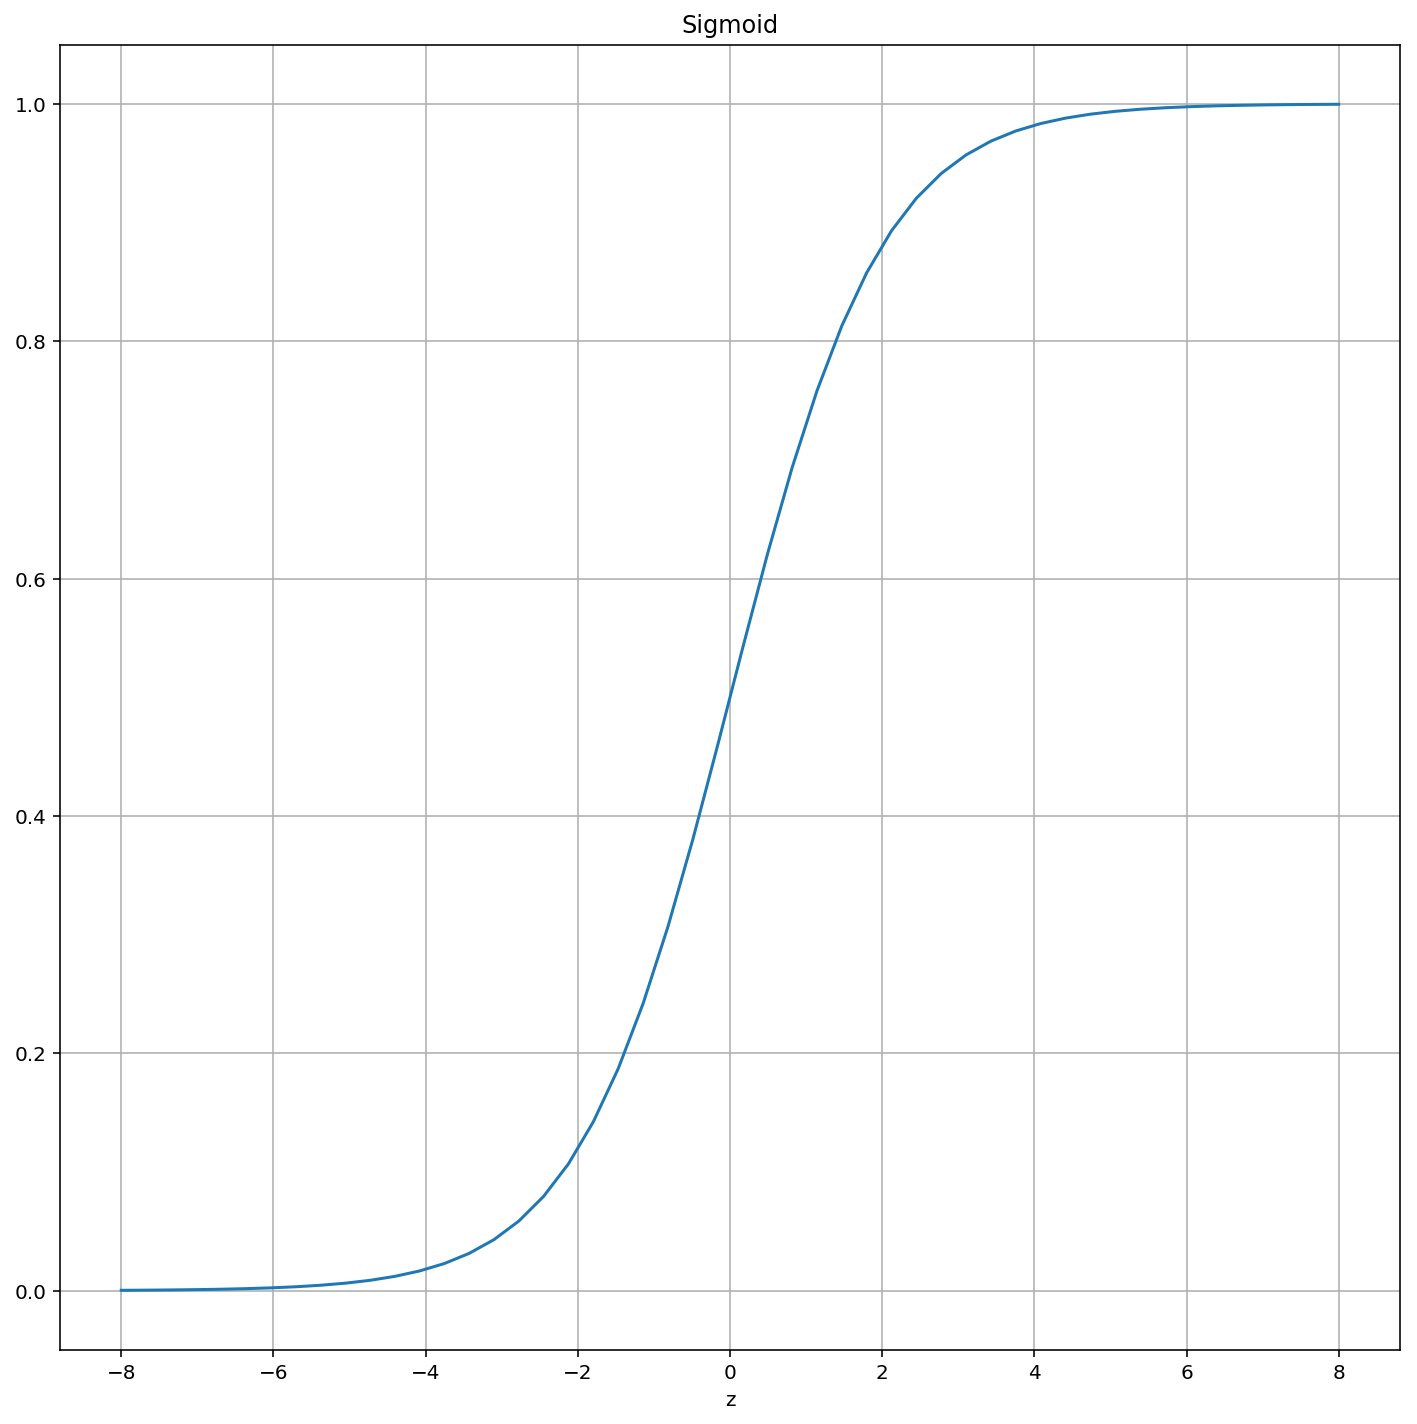

In [25]:
tmp = np.linspace(-8,8)
sigmoid = lambda z: 1.0 / (1 + np.exp(-z))

plt.plot(tmp, sigmoid(tmp))
plt.grid()
plt.xlabel('z')
plt.title('Sigmoid')
plt.show()

## 연속 확률 모델

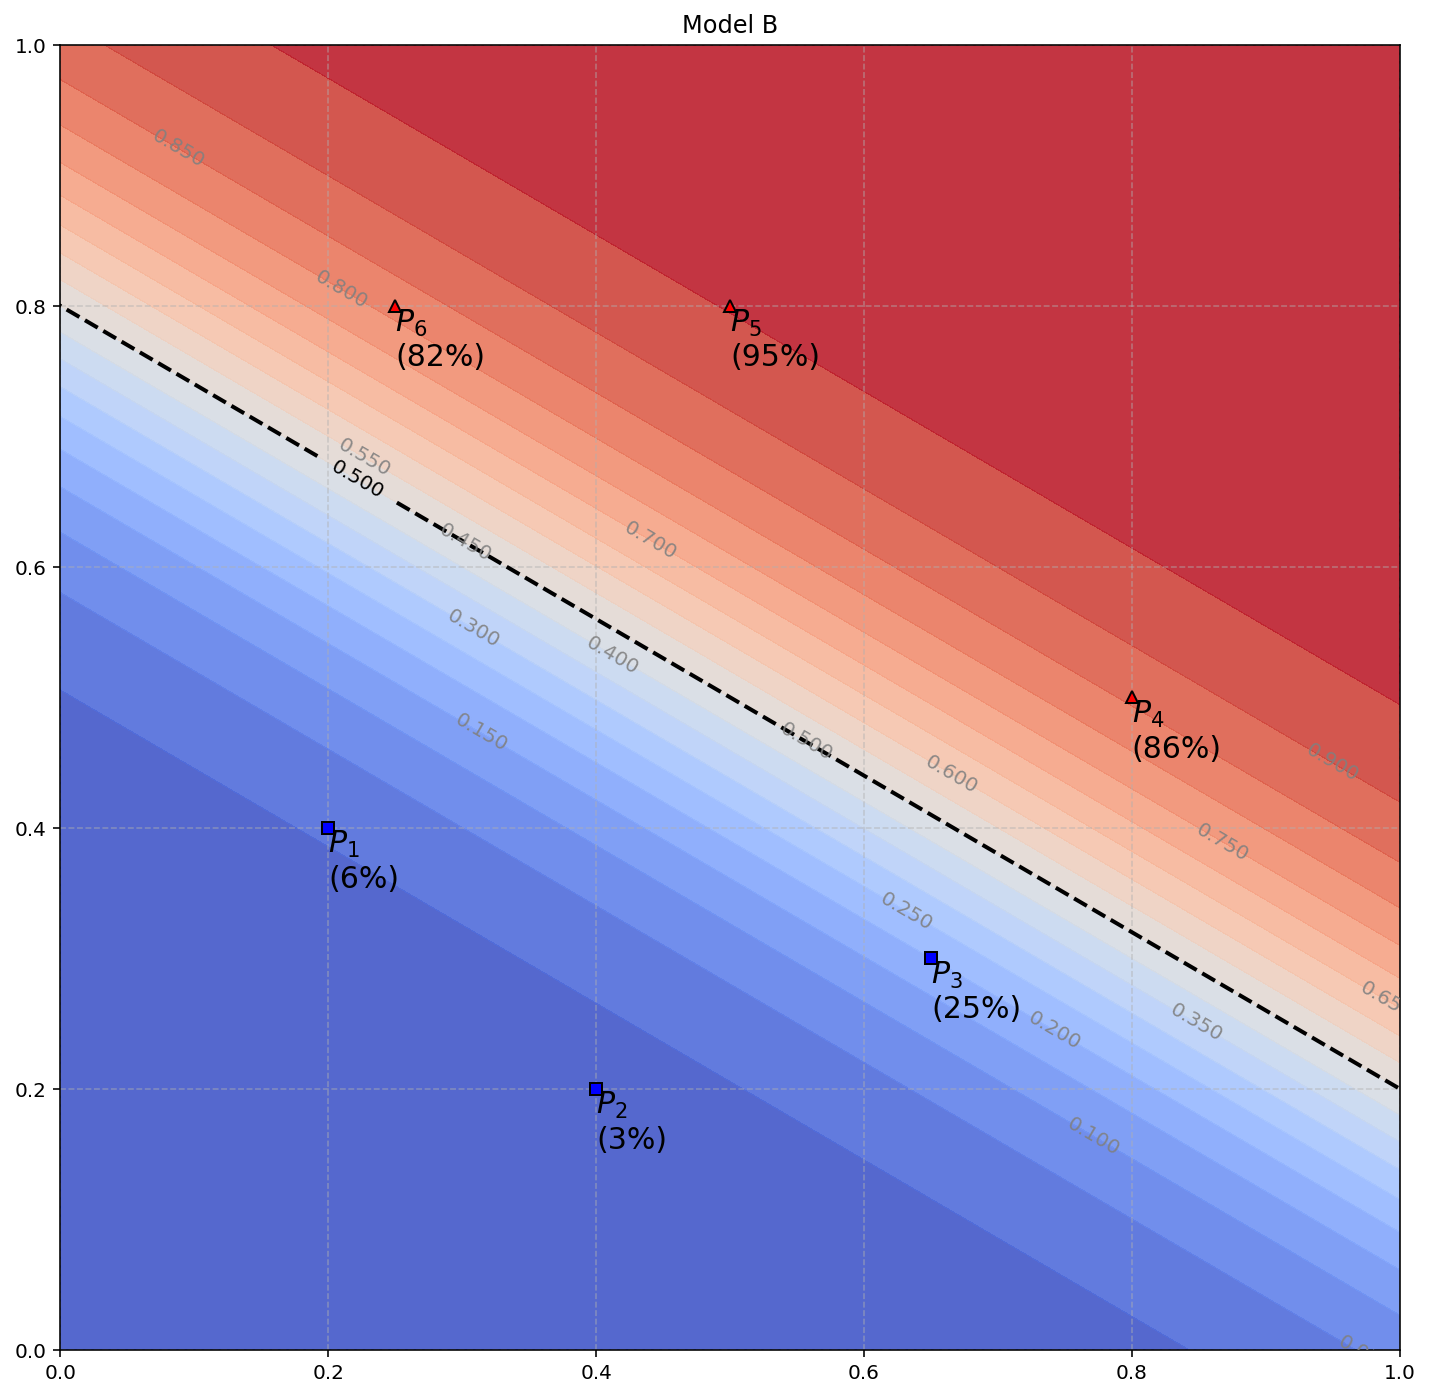

In [30]:
# Model B
W = tf.Variable(np.array([[6],[10]]), dtype=tf.float64)
b = tf.Variable(np.array([-8]), dtype=tf.float64)
x = tf.placeholder(tf.float64, shape=(None, 2))
yhat = tf.nn.sigmoid(tf.matmul(x,W) + b)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

plot_model(sess, yhat, lambda x,y:[x,y], 'Model B')

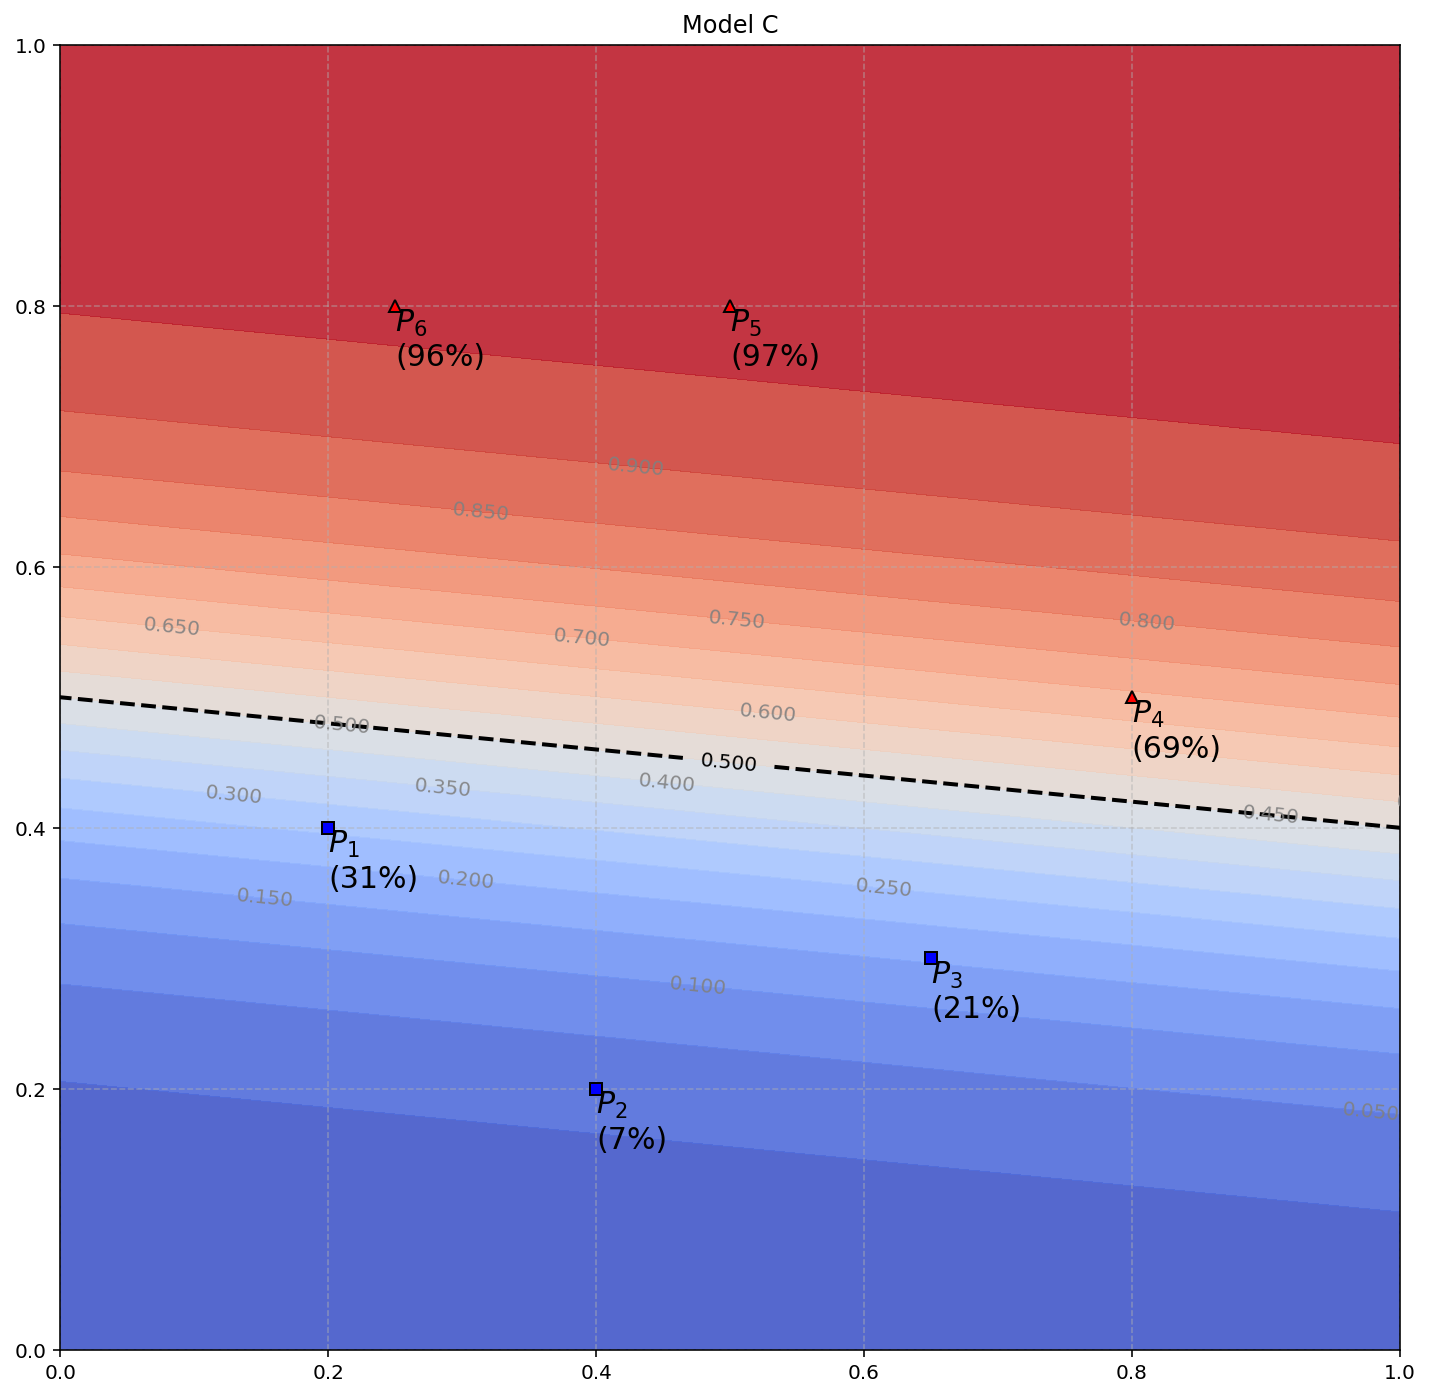

In [31]:
# Model C
W = tf.Variable(np.array([[1],[10]]), dtype=tf.float64)
b = tf.Variable(np.array([-5]), dtype=tf.float64)
x = tf.placeholder(tf.float64, shape=(None, 2))
yhat = tf.nn.sigmoid(tf.matmul(x,W) + b)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

plot_model(sess, yhat, lambda x,y:[x,y], 'Model C')

## 최대우도법(Maximum likelihood Estimation)

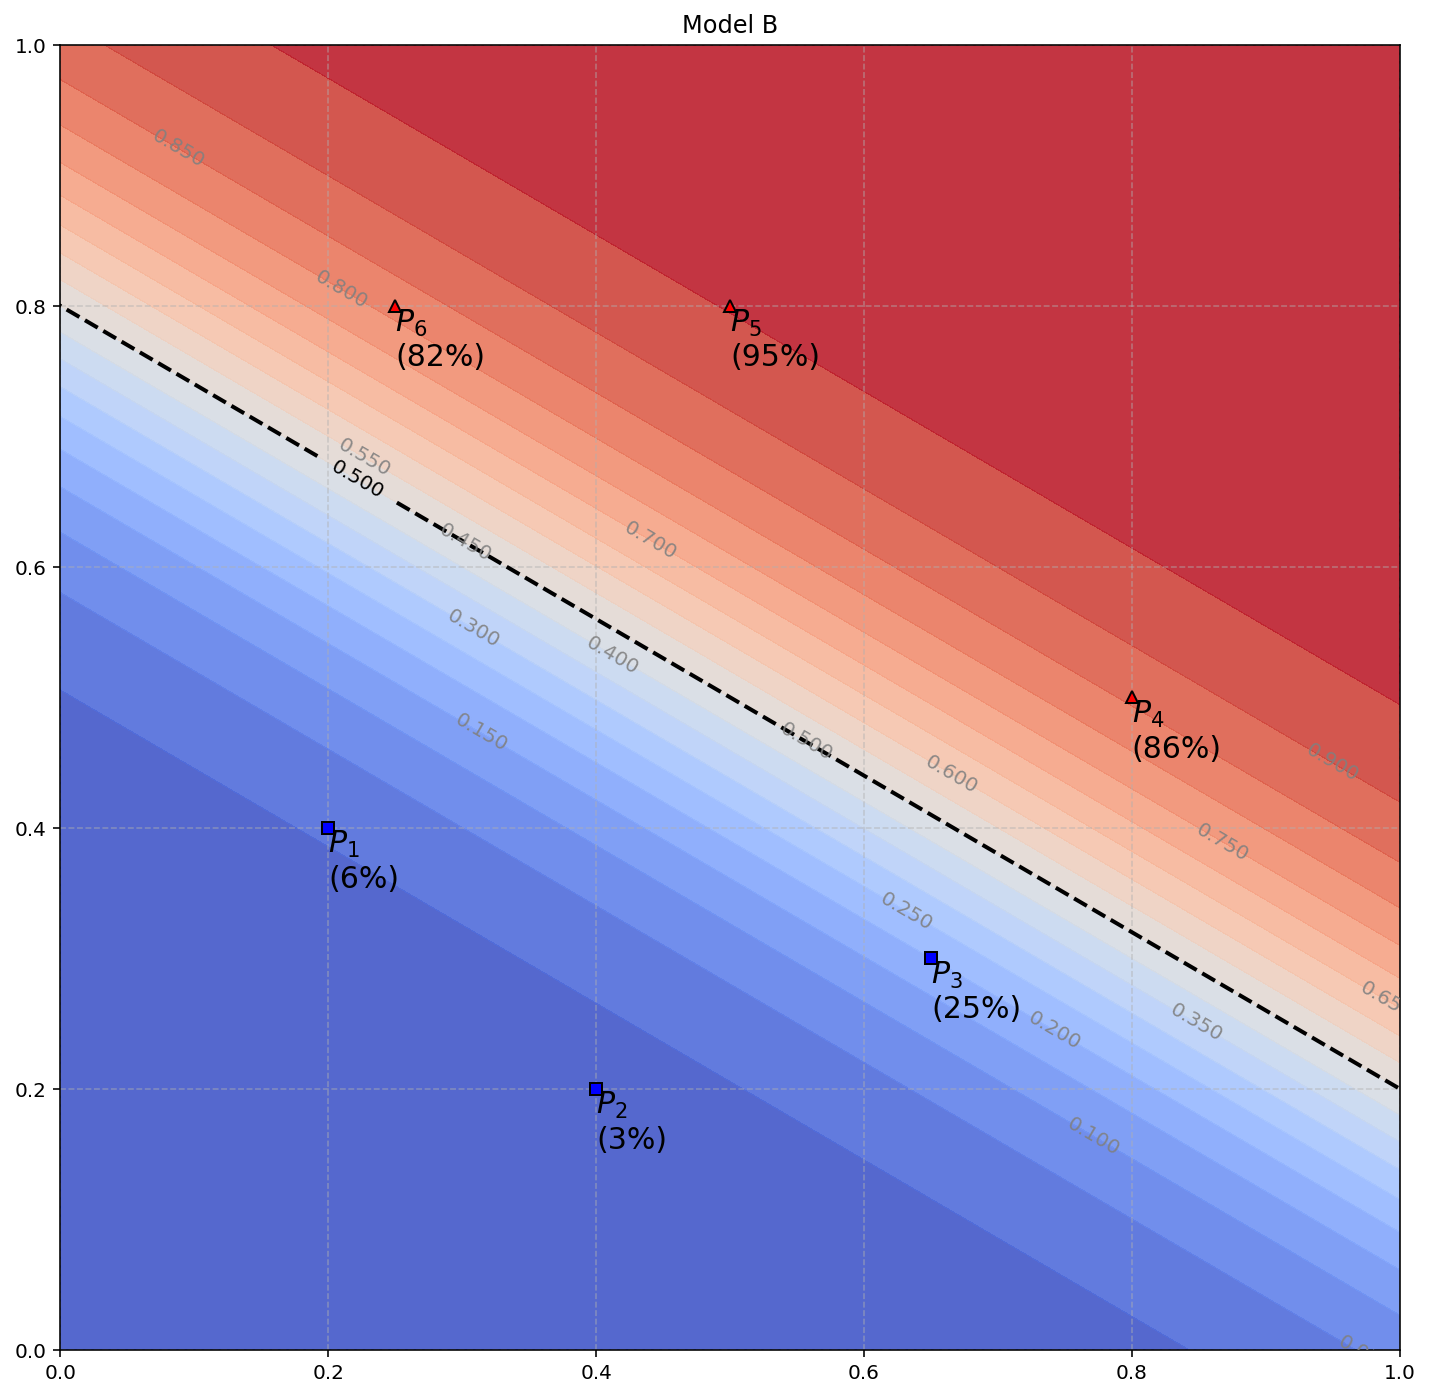

In [32]:
# Model B
W = tf.Variable(np.array([[6],[10]]), dtype=tf.float64)
b = tf.Variable(np.array([-8]), dtype=tf.float64)
x = tf.placeholder(tf.float64, shape=(None, 2))
yhat = tf.nn.sigmoid(tf.matmul(x,W) + b)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

plot_model(sess, yhat, lambda x,y:[x,y], 'Model B')

In [33]:
predic = sess.run(yhat, feed_dict = {x: xy})
print(predic)

[[0.05732418]
 [0.02659699]
 [0.24973989]
 [0.85814894]
 [0.95257413]
 [0.81757448]]


In [34]:
predic[0:3] = 1 - predic[0:3]
print(predic)

[[0.94267582]
 [0.97340301]
 [0.75026011]
 [0.85814894]
 [0.95257413]
 [0.81757448]]


In [36]:
prob = np.prod(predic)
print(prob)

0.46010365197843245


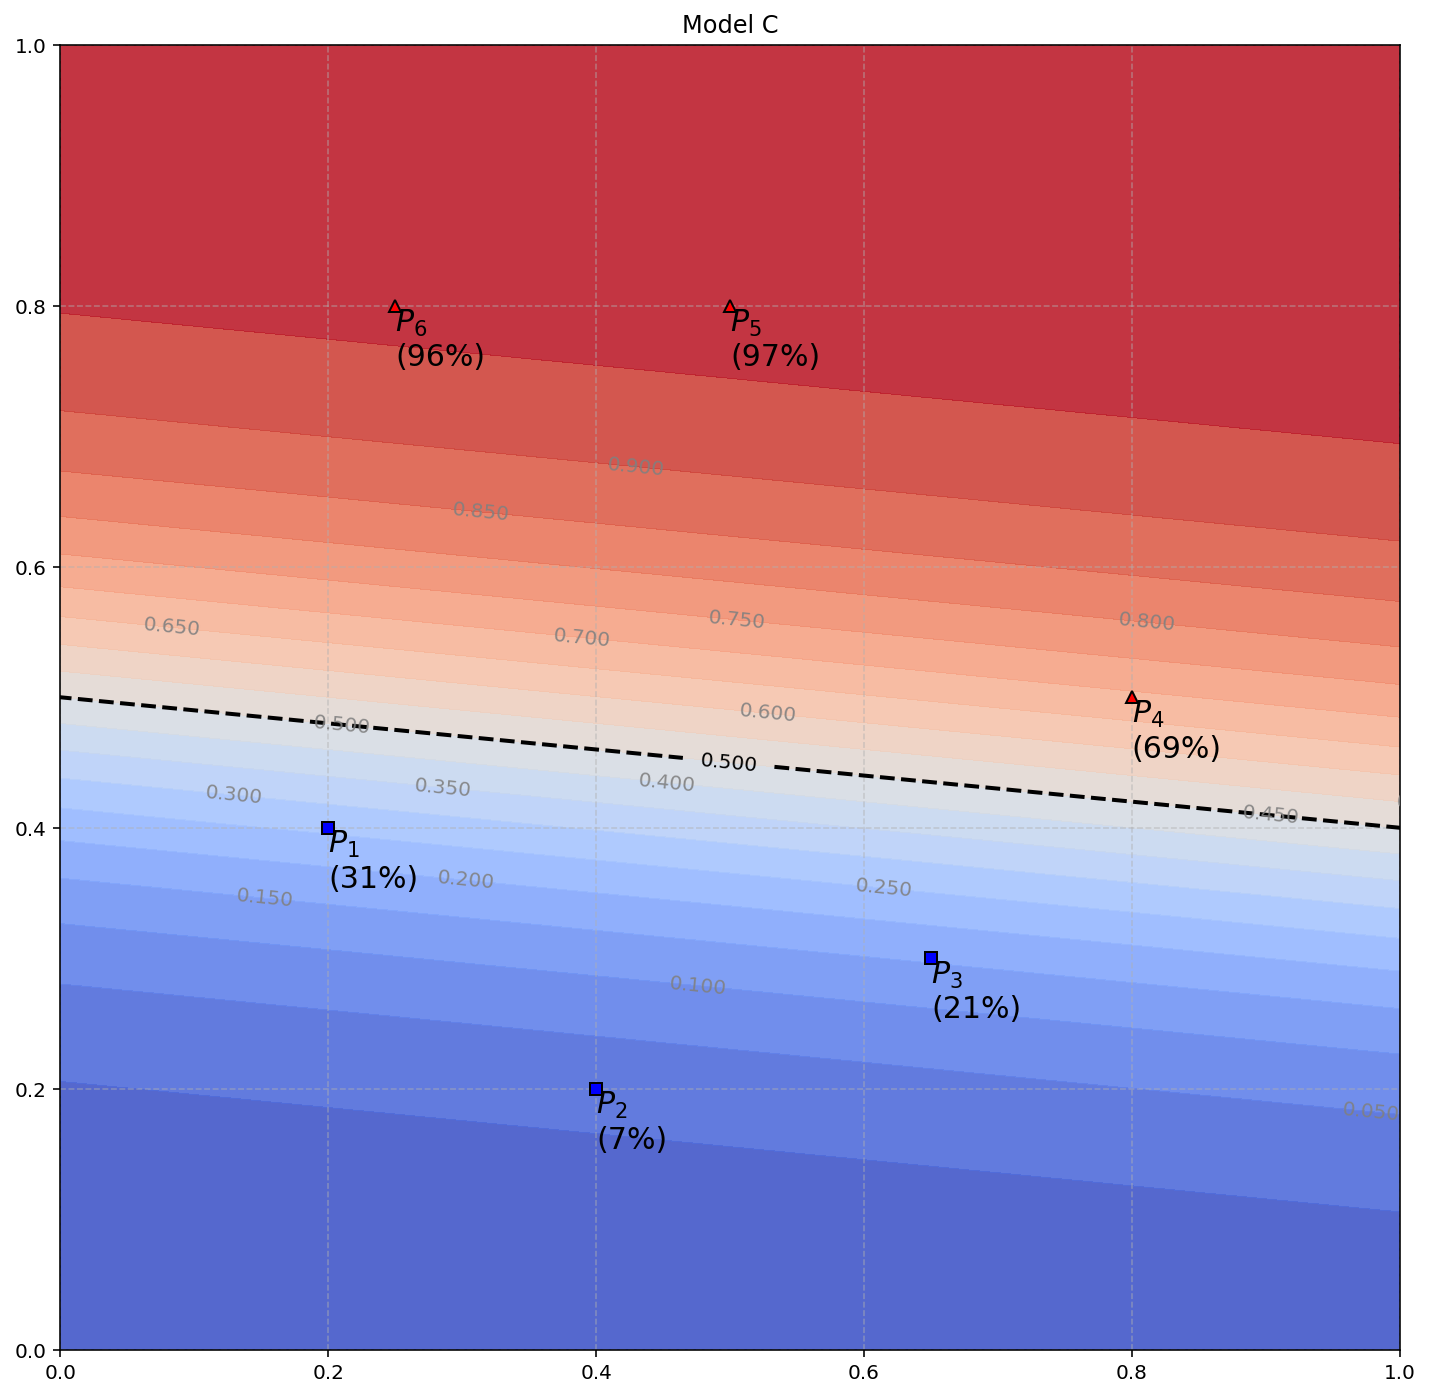

In [37]:
# Model C
W = tf.Variable(np.array([[1],[10]]), dtype=tf.float64)
b = tf.Variable(np.array([-5]), dtype=tf.float64)
x = tf.placeholder(tf.float64, shape=(None, 2))
yhat = tf.nn.sigmoid(tf.matmul(x,W) + b)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

plot_model(sess, yhat, lambda x,y:[x,y], 'Model C')

In [38]:
predic = sess.run(yhat, feed_dict = {x: xy})
print(predic)

predic[0:3] = 1 - predic[0:3]
print(predic)

prob = np.prod(predic)
print(prob)

[[0.31002552]
 [0.06913842]
 [0.20587037]
 [0.68997448]
 [0.97068777]
 [0.96267311]]
[[0.68997448]
 [0.93086158]
 [0.79412963]
 [0.68997448]
 [0.97068777]
 [0.96267311]]
0.3288523591939082


## 크로스 엔트로피(Cross Entropy)

In [42]:
# Model B
W = tf.Variable(np.array([[6],[10]]), dtype=tf.float64)
b = tf.Variable(np.array([-8]), dtype=tf.float64)
x = tf.placeholder(tf.float64, shape=(None, 2))
yhat = tf.nn.sigmoid(tf.matmul(x,W) + b)

# Loss
y = tf.placeholder(tf.float64, shape=(None,1))
loss = tf.reduce_sum(-y * tf.log(yhat) - (1-y) * tf.log(1-yhat))

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

predic, loss_val = sess.run([yhat, loss], feed_dict={x:xy, y:labels})
predic[0:3] = 1-predic[0:3]
prob = np.prod(predic)
print(-np.log(prob), loss_val)

0.7763034844941786 0.7763034844941787


In [44]:
# Model B
W = tf.Variable(np.array([[1],[10]]), dtype=tf.float64)
b = tf.Variable(np.array([-5]), dtype=tf.float64)
x = tf.placeholder(tf.float64, shape=(None, 2))
yhat = tf.nn.sigmoid(tf.matmul(x,W) + b)

# Loss
y = tf.placeholder(tf.float64, shape=(None,1))
loss = tf.reduce_sum(-y * tf.log(yhat) - (1-y) * tf.log(1-yhat))

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

predic, loss_val = sess.run([yhat, loss], feed_dict={x:xy, y:labels})
predic[0:3] = 1-predic[0:3]
prob = np.prod(predic)
print(-np.log(prob), loss_val)

1.112146385187504 1.1121463851875042


## 미니 배치 방법을 통한 모델 학습

In [45]:
# Model
W = tf.Variable(tf.ones([2,1]), tf.float32)
b = tf.Variable(-1.0, tf.float32)

x = tf.placeholder(tf.float32, shape=(None,2))
y = tf.placeholder(tf.float32, shape=(None,1))

yhat = tf.sigmoid(tf.matmul(x,W)+b)
loss = tf.reduce_sum(-y * tf.log(yhat) - (1-y) * tf.log(1-yhat))

features = xy

In [46]:
# Optimization
MaxEpochs = 50
lr = 1.0
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

from helper import generate_batches
idx = np.arange(0,len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

batch_size = 10
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

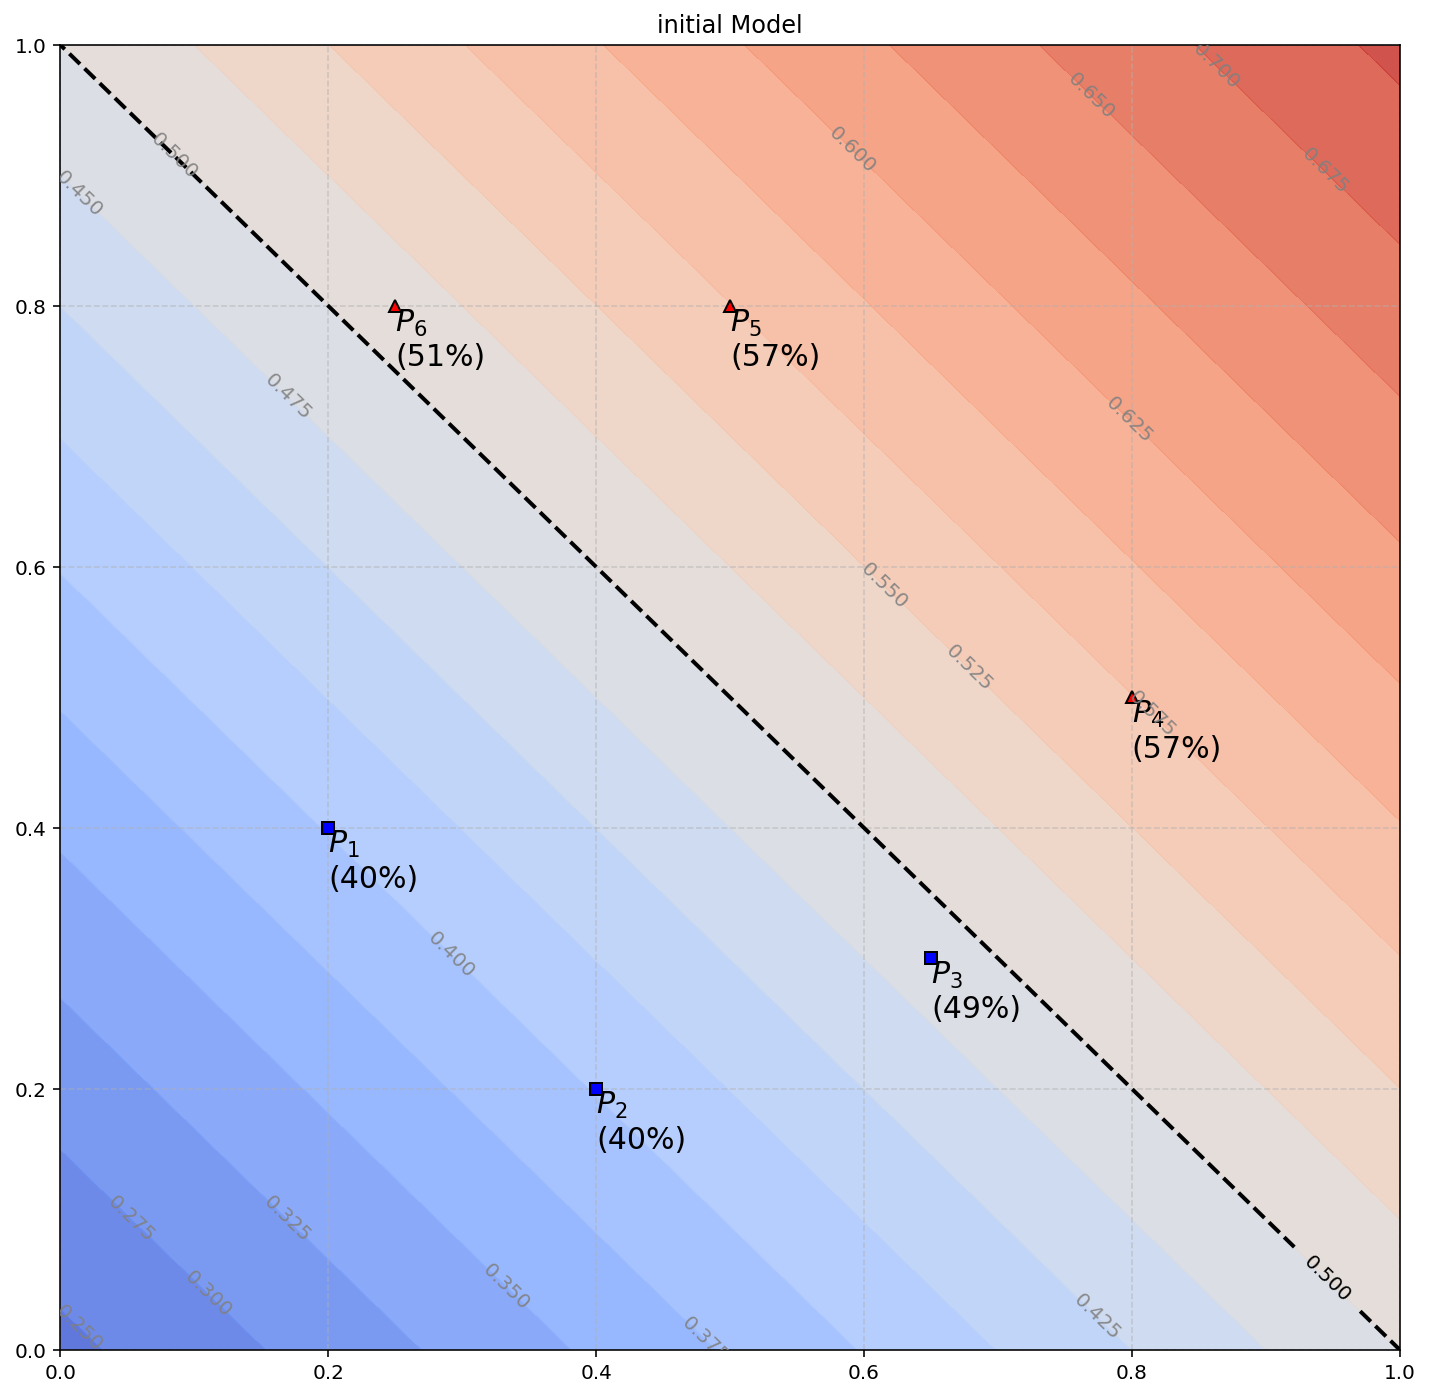

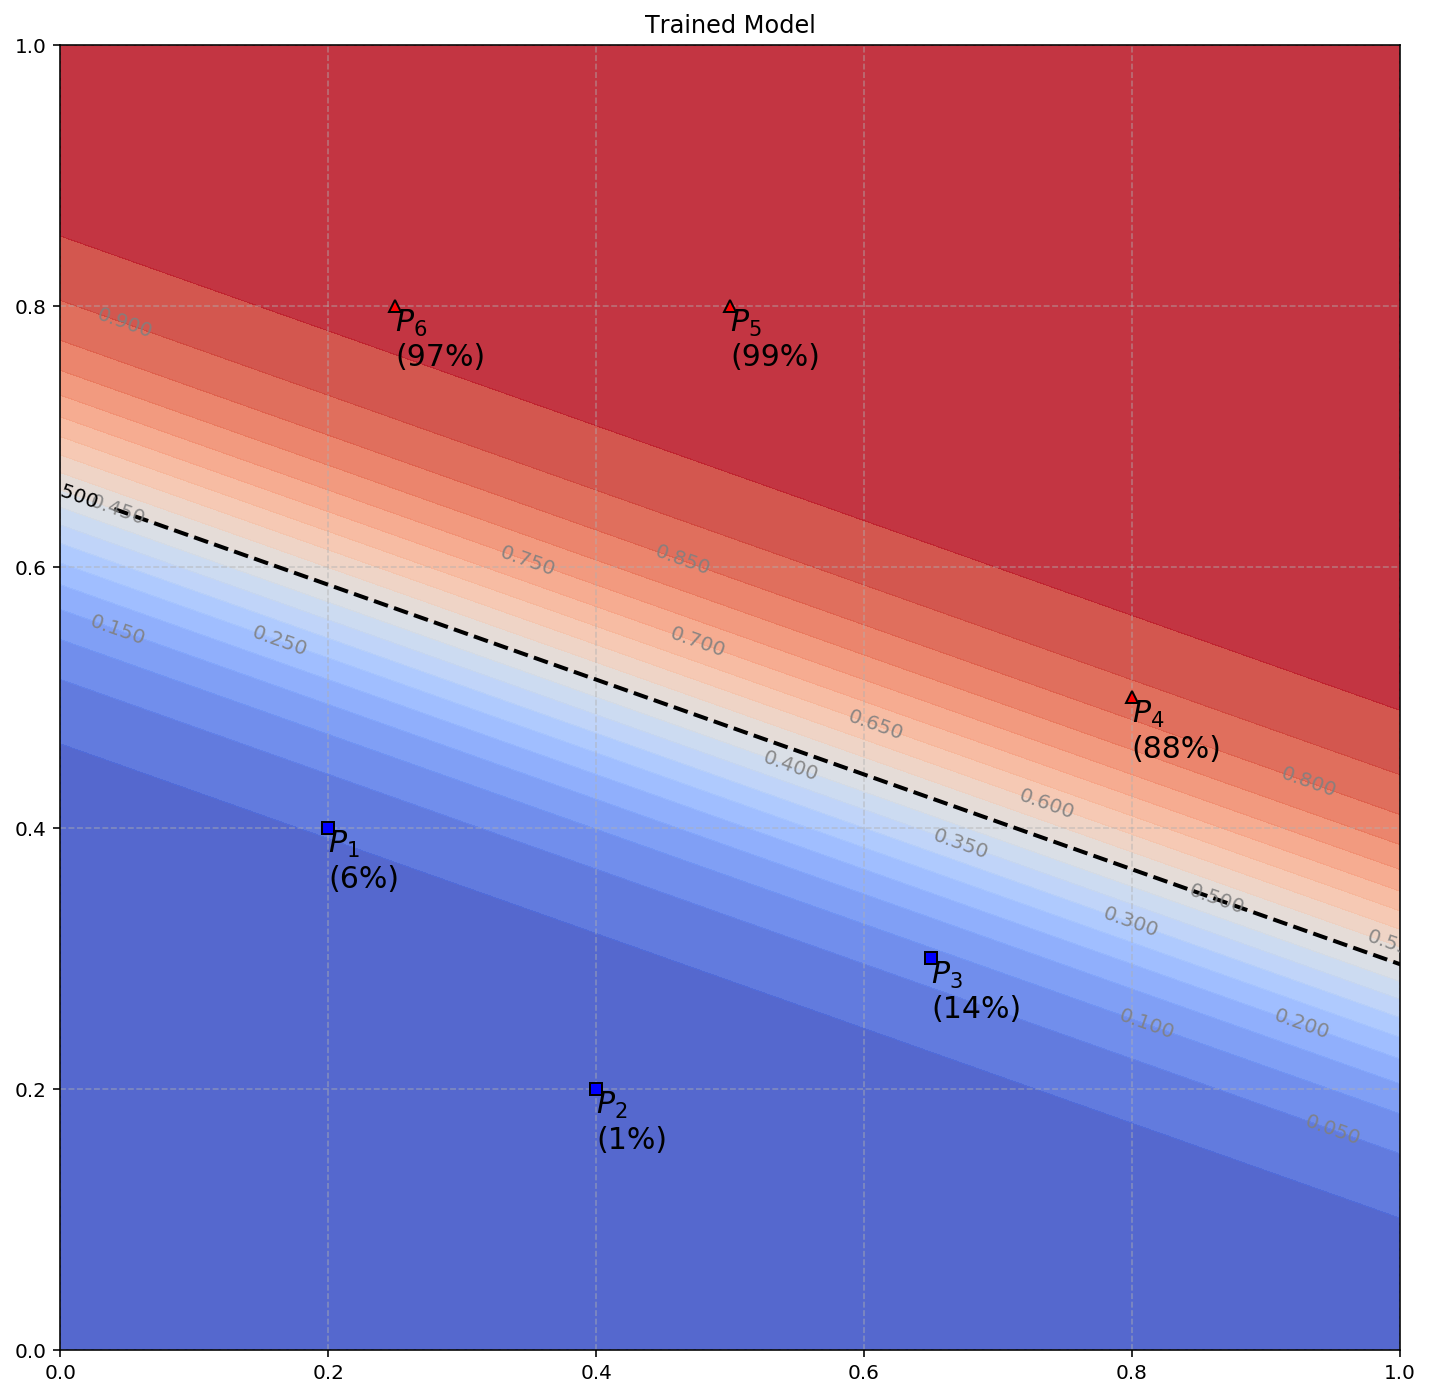

In [47]:
plot_model(sess,yhat,lambda x,y:[x,y], 'initial Model')
for epoch in range(MaxEpochs):
    for x_batch, y_batch in generate_batches(batch_size,
                                             shuffled_features,
                                            shuffled_labels):
        sess.run(train, feed_dict = {x:x_batch, y:y_batch.reshape(-1,1)})
W_adam, b_adam = sess.run([W,b])
plot_model(sess,yhat,lambda x,y:[x,y], 'Trained Model')

In [48]:
predic, loss_val = sess.run([yhat, loss], feed_dict={x:xy, y:labels})
predic[0:3] = 1-predic[0:3]
prob = np.prod(predic)
print(-np.log(prob), loss_val)

0.376359 0.37635902


## 특성값을 이용한 비선형 분류 모델

In [49]:
from sklearn.datasets import make_circles
xy, labels = make_circles(n_samples=400, noise = 0.1)

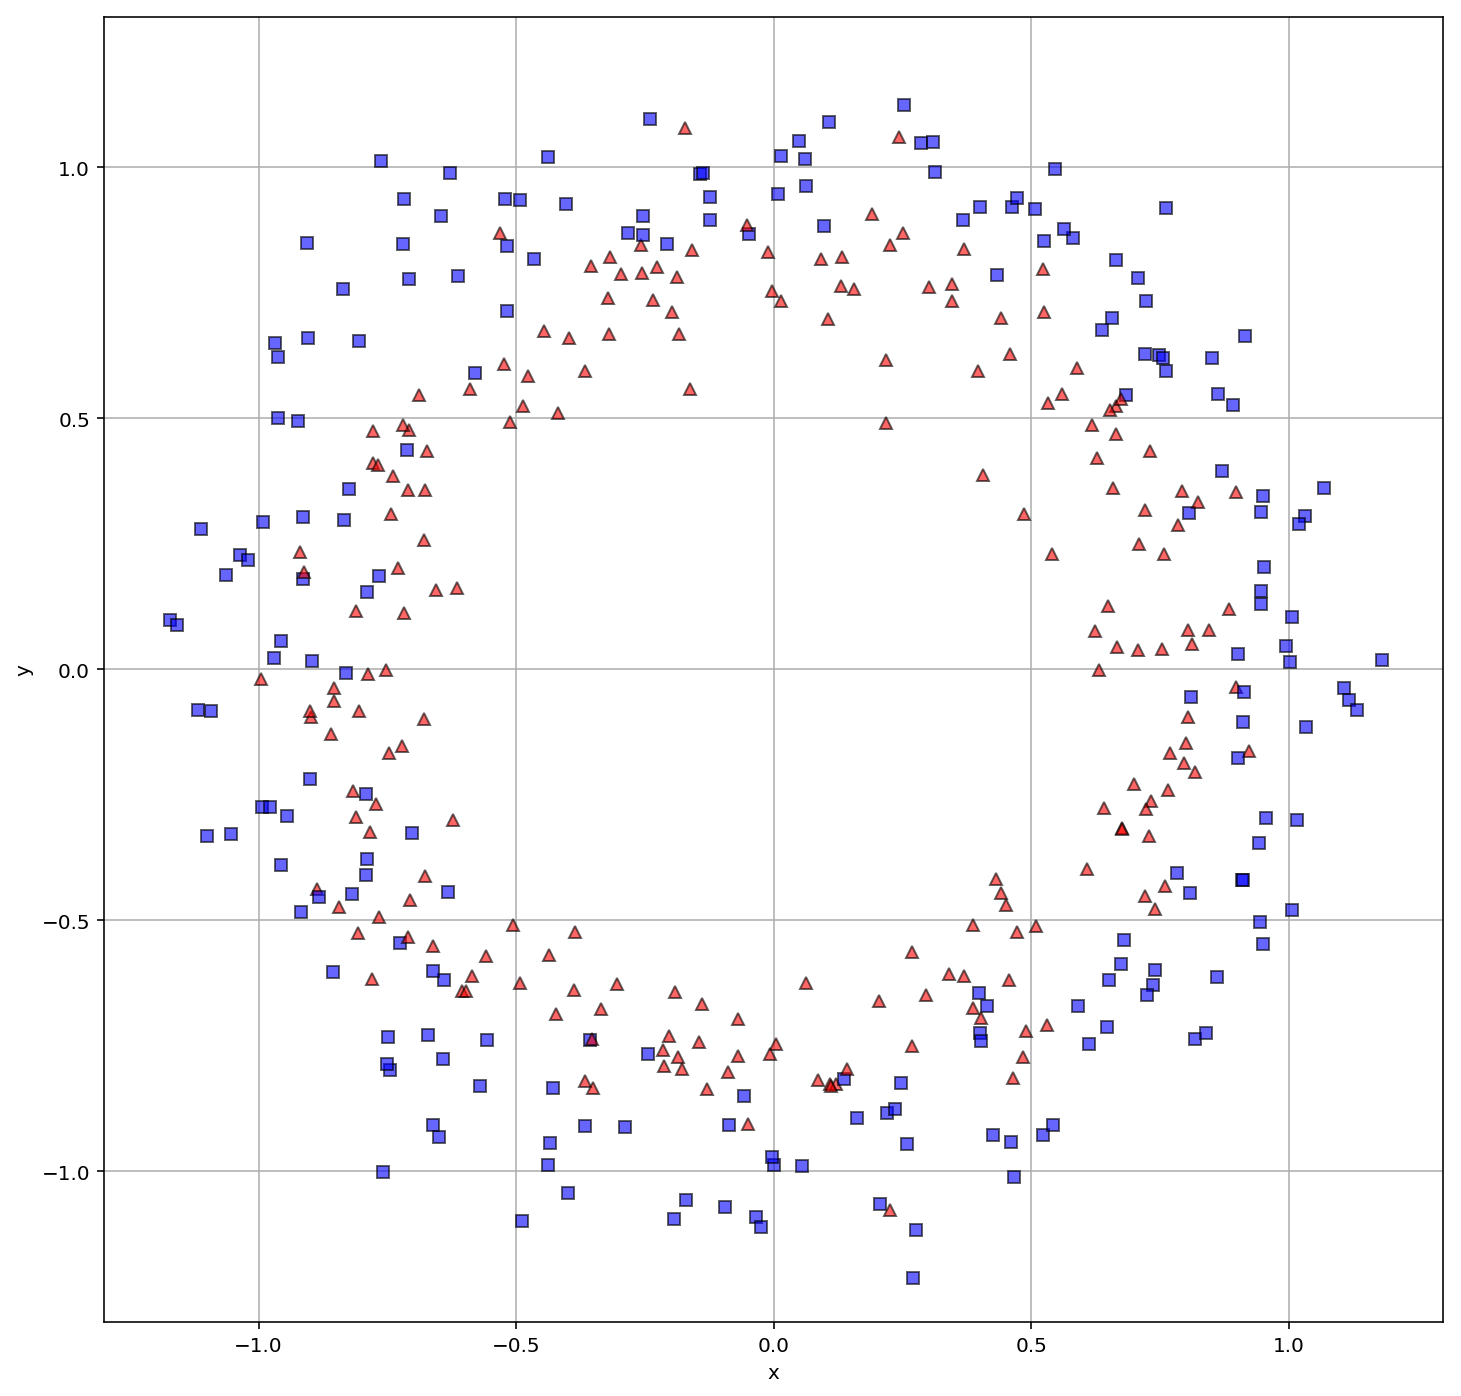

In [54]:
plot_data(xy,labels)

In [55]:
features = np.array([[xval**2, yval**2] for xval, yval in xy])

In [56]:
# Model
W = tf.Variable(tf.ones([2,1]), tf.float32)
b = tf.Variable(-1/4, tf.float32)

x = tf.placeholder(tf.float32, shape=(None,2))
y = tf.placeholder(tf.float32, shape=(None,1))

yhat = tf.sigmoid(tf.matmul(x,W)+b)
loss = tf.reduce_sum(-y * tf.log(yhat) - (1-y) * tf.log(1-yhat))

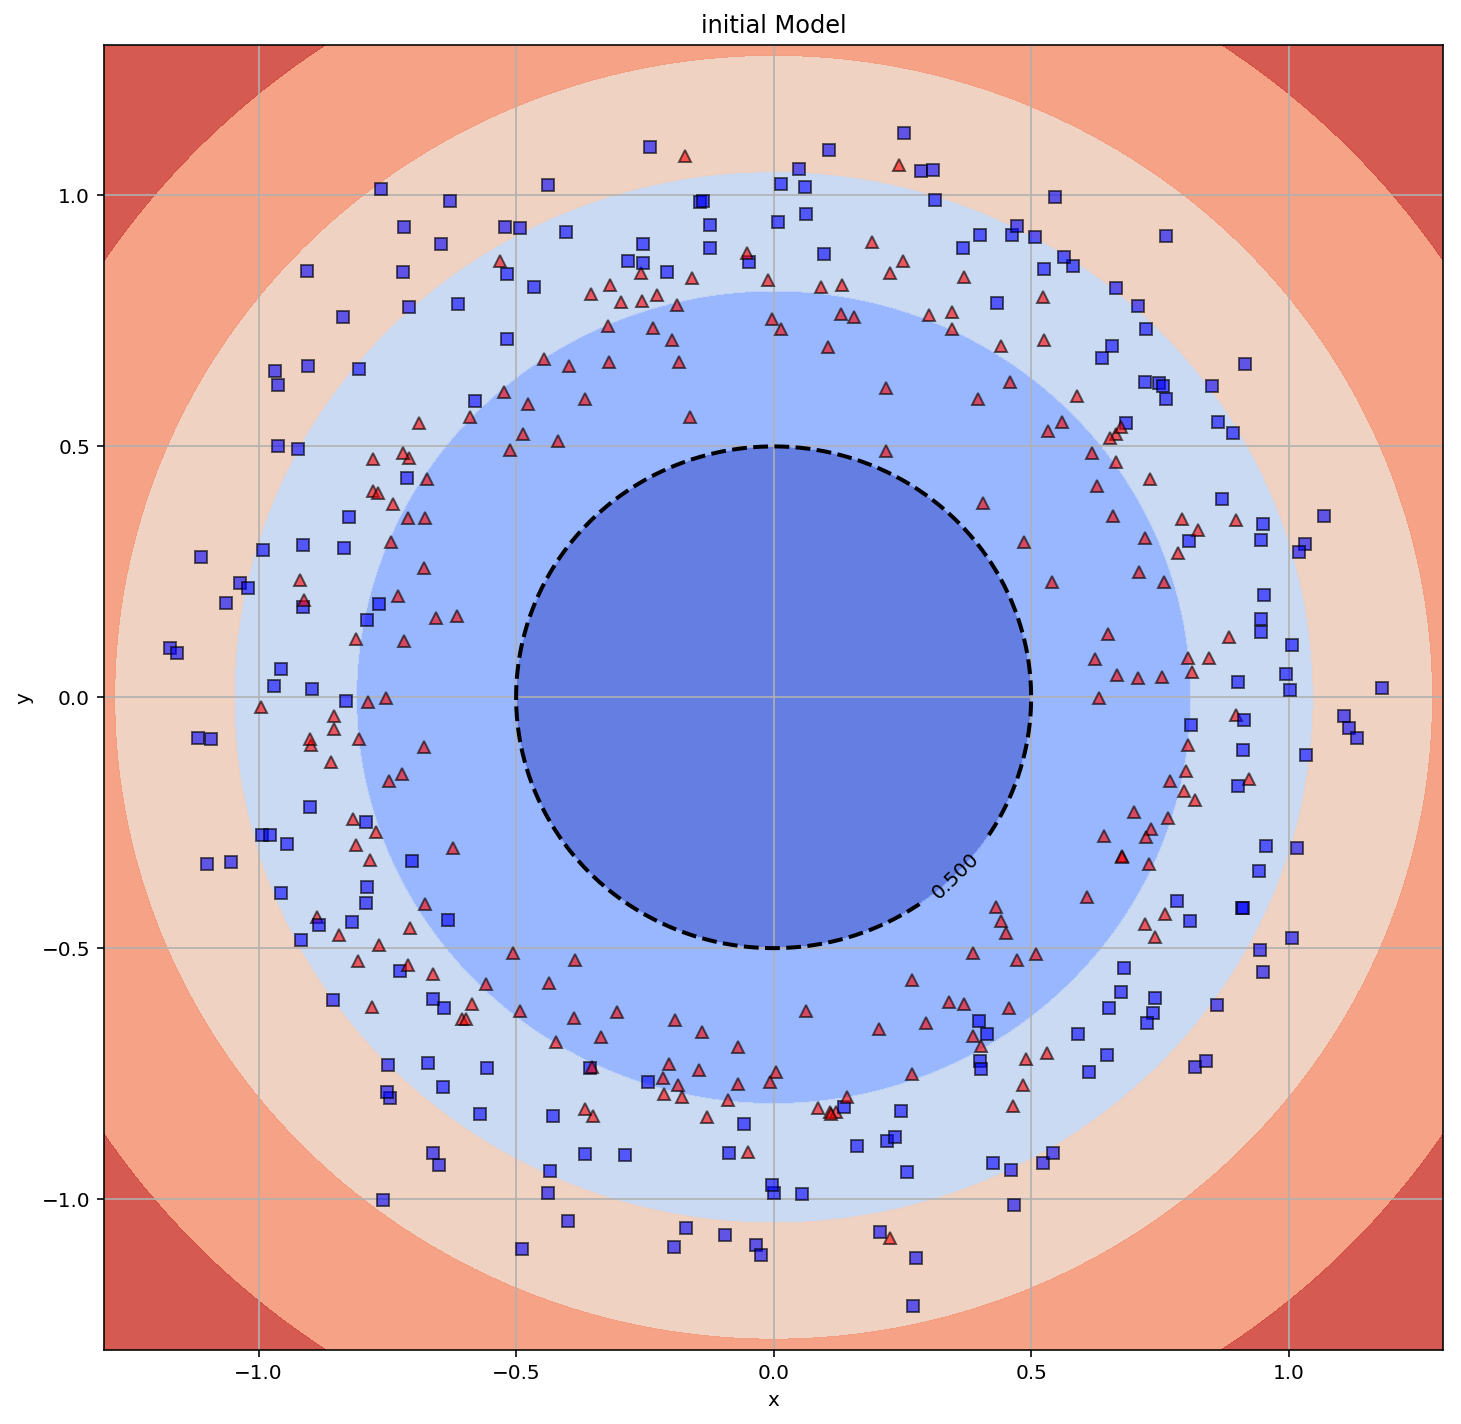

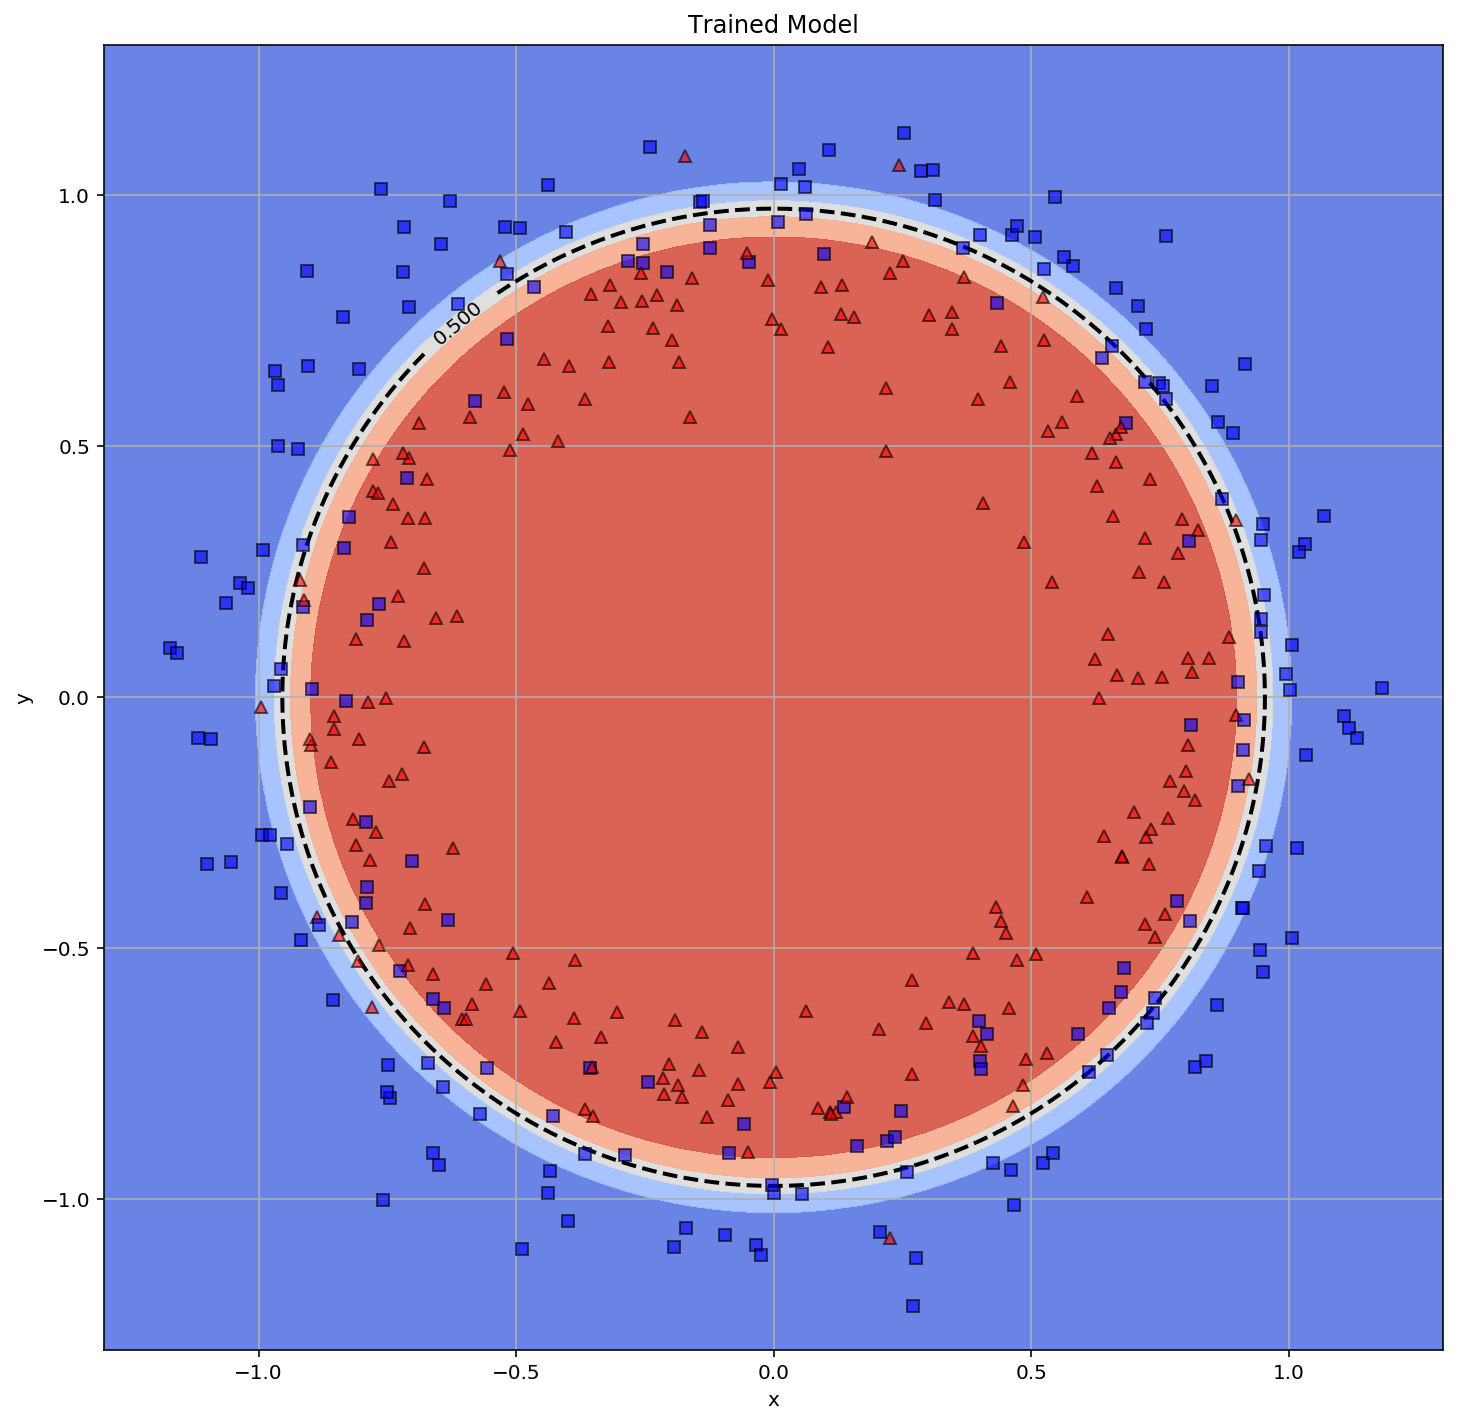

In [60]:
# Optimization
MaxEpochs = 50
lr = 1.0
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

from helper import generate_batches
idx = np.arange(0,len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

batch_size = 10
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

plot_model2(sess,yhat,lambda x,y:[x**2,y**2], 'initial Model')
for epoch in range(MaxEpochs):
    for x_batch, y_batch in generate_batches(batch_size,
                                             shuffled_features,
                                            shuffled_labels):
        sess.run(train, feed_dict = {x:x_batch, y:y_batch.reshape(-1,1)})
W_adam, b_adam = sess.run([W,b])
plot_model2(sess,yhat,lambda x,y:[x**2,y**2], 'Trained Model')

## 다중 분류 모델

### 원-핫(One-hot) 인코딩

In [62]:
xy = np.array([[.2, .4], [.4, .2], [.65,.3], [.8, .5], 
               [.5, .8], [.25, .8]])

features = np.array([[xval, yval] for xval, yval in xy])
features[:5]
print(features)

labels = np.array([[0, 1],[0, 1],[0, 1],[1, 0],[1, 0],[1, 0]])
print(labels)

[[0.2  0.4 ]
 [0.4  0.2 ]
 [0.65 0.3 ]
 [0.8  0.5 ]
 [0.5  0.8 ]
 [0.25 0.8 ]]
[[0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]]


In [64]:
# Model
W = tf.Variable(tf.ones([2,2]), tf.float32)
b = tf.Variable(tf.ones([2]), tf.float32)

x = tf.placeholder(tf.float32, shape=(None,2))
y = tf.placeholder(tf.float32, shape=(None,2))

yhat = tf.nn.softmax(tf.matmul(x,W)+b)
loss = tf.reduce_mean(tf.reduce_sum(-y * tf.log(yhat), 1))

In [67]:
# Optimization
MaxEpochs = 25
lr = 0.5
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

from helper import generate_batches
idx = np.arange(0,len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

batch_size = 5
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpochs):
        if epoch % 10 ==0:
            curr_b, curr_W, curr_loss = sess.run([b,W,loss],
                                                feed_dict={x:shuffled_features,
                                                          y:shuffled_labels})
            print(epoch, curr_b.flatten(), curr_W.flatten(), curr_loss)
        for x_batch, y_batch in generate_batches(batch_size, shuffled_features,
                                                shuffled_labels):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})
        
        curr_b_adam, curr_W_adam = sess.run([b,W])

0 [1. 1.] [1. 1. 1. 1.] 0.6931472
10 [-0.46716362  2.467164  ] [ 0.878605   1.1213955  4.1013002 -2.1012995] 0.31001756
20 [-1.6764327  3.6764338] [ 1.6693131   0.33068758  6.031811   -4.03181   ] 0.17205675


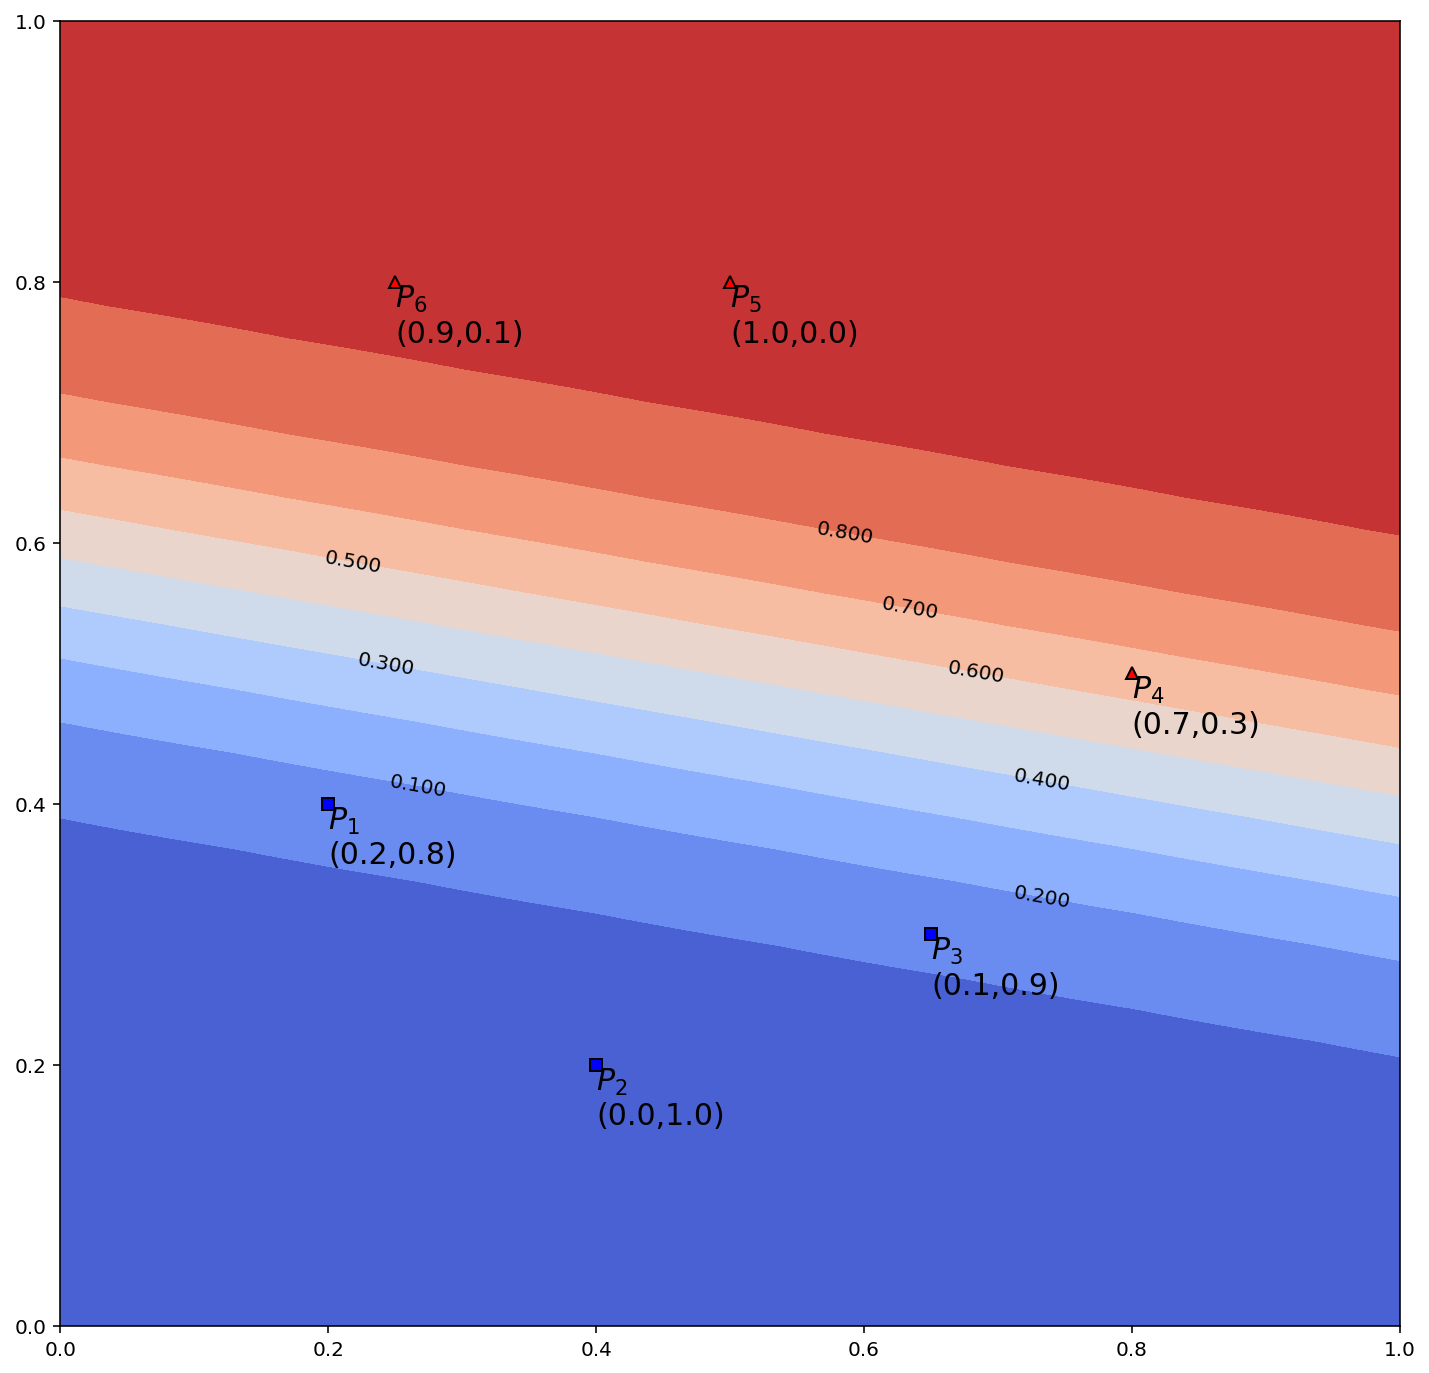

In [68]:
plot_scatter_softmax(curr_W_adam,curr_b_adam,xy,labels)

## MNIST

In [69]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [70]:
from collections import Counter
freq = Counter([np.argmax(label) for label in mnist.train.labels])
for k in range(0,10):
    print('label {0} : {1}개'.format(k, freq[k]))

label 0 : 5444개
label 1 : 6179개
label 2 : 5470개
label 3 : 5638개
label 4 : 5307개
label 5 : 4987개
label 6 : 5417개
label 7 : 5715개
label 8 : 5389개
label 9 : 5454개


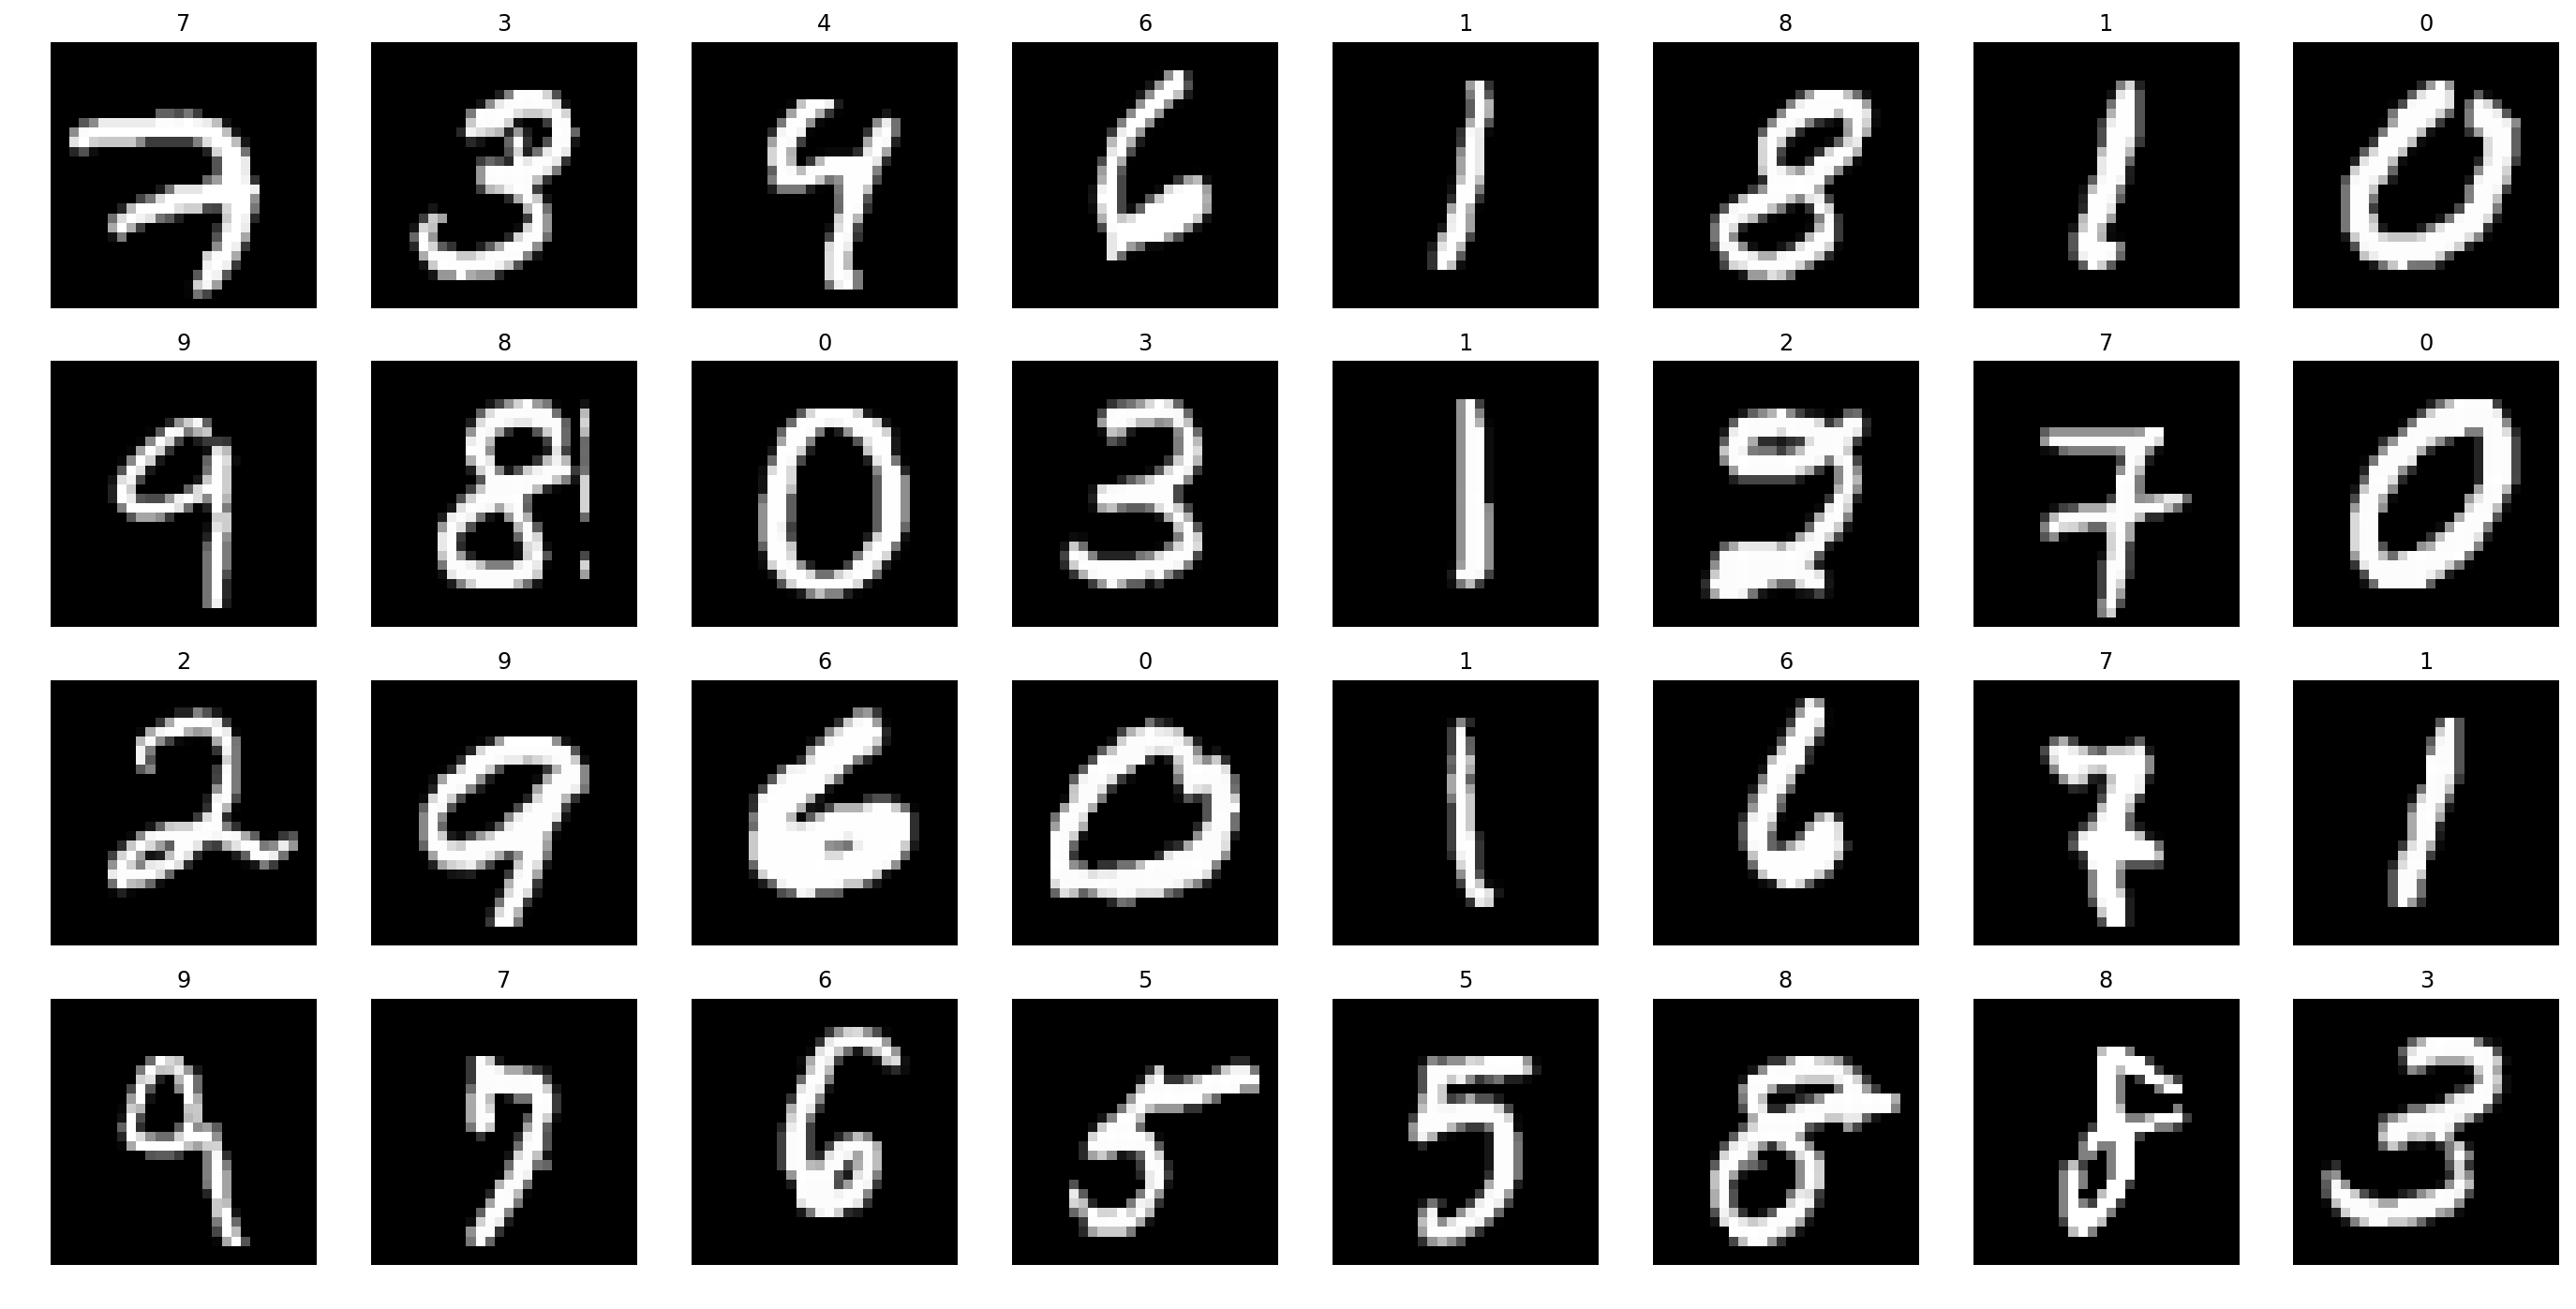

In [72]:
plt.figure(figsize=(24,12))
for k in range(32):
    img = mnist.train.images[k].reshape(28,28)
    label = np.argmax(mnist.train.labels[k])
    plt.subplot(4,8,1+k)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(label)
plt.show()

In [73]:
print(img)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [74]:
features = mnist.train.images
labels = mnist.train.labels

In [76]:
# Model
x = tf.placeholder(tf.float32, [None, 784])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
yhat = tf.nn.softmax(tf.matmul(x,W) + b)

# Loss
y = tf.placeholder(tf.float32, [None,10])
loss = tf.reduce_mean(tf.reduce_sum(-y * tf.log(yhat),1))

In [90]:
# Optimization
MaxEpochs = 3
lr = 0.01
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

## 정확도
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(yhat,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [91]:
batch_size = 256
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for epoch in range(MaxEpochs):
    for step in range(len(mnist.train.images) // batch_size + 1):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={x:batch_xs, y:batch_ys})
        if step % 20 == 0:
            curr_W, curr_b, curr_loss = sess.run([W,b,loss],
                                                feed_dict={x:features,
                                                          y:labels})
            curr_acc = sess.run(accuracy,
                               feed_dict={x:mnist.test.images,
                                         y:mnist.test.labels})
            print(epoch, step, curr_loss, curr_acc)
    print("")

0 0 1.9305778 0.4996
0 20 0.47314966 0.8709
0 40 0.3864503 0.8978
0 60 0.35559866 0.9052
0 80 0.3406119 0.9074
0 100 0.32571542 0.9115
0 120 0.31454518 0.9134
0 140 0.3094806 0.916
0 160 0.29924196 0.919
0 180 0.29277647 0.9184
0 200 0.2884987 0.9185

1 0 0.28711137 0.9218
1 20 0.2904462 0.9189
1 40 0.29369912 0.9155
1 60 0.28708255 0.9171
1 80 0.2805809 0.9192
1 100 0.27853397 0.9217
1 120 0.2809222 0.9217
1 140 0.2772026 0.9222
1 160 0.2723394 0.9212
1 180 0.30589288 0.9101
1 200 0.28365982 0.9166

2 0 0.26874167 0.9218
2 20 0.27105233 0.9203
2 40 0.26687163 0.922
2 60 0.26502898 0.9244
2 80 0.26501587 0.9232
2 100 0.2633899 0.926
2 120 0.26007915 0.9257
2 140 0.26329035 0.9222
2 160 0.2642669 0.9235
2 180 0.2619798 0.9232
2 200 0.259853 0.9246

